In [46]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel
from astropy.visualization import simple_norm
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.stats import SigmaClip
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [47]:
epoch = 2
path = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch{}/'.format(epoch)
wpath = '{}wfc3/'.format(path)
apath = '{}acs/'.format(path)

WFC3 first

In [48]:
drcs = glob.glob('{}*drc.fits'.format(wpath))
drcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03010_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03020_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03031_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03041_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03051_drc.fits']

In [49]:
flcs = glob.glob('{}*flc.fits'.format(wpath))
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yzq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z0q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zcq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zeq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z8q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z2q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z7q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zdq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z9q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zaq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zbq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yvq_flc.fits']

In [50]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F763M,7612.744622820045,0.26773,0.55477,0.7152,0.81145,0.84248,0.85692,0.87002,0.88439,0.89693,0.90387,0.90954,0.91542,0.92223,0.92819,0.93206,0.93516,0.93845,0.94164,0.94411,0.94662,0.9492,0.95133,0.95338,0.95513,0.95628,0.9567,0.95778,0.95889,0.95942,0.95955,0.95992,0.96149,0.96251,0.96333,0.96488,0.96589,0.96691,0.96787,0.96855,0.96924,0.96992,0.9706,0.97128,0.97197,0.97265,0.97333,0.97401,0.9747,0.97538,0.97606,1.0
F775W,7648.3046091546,0.26053,0.54776,0.70804,0.80632,0.84195,0.85724,0.8703,0.88415,0.89622,0.90392,0.9

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03010_drc.fits
F275W
1770.0
   aperture_sum   
------------------
1.2414054061766095
5.142773595777662e-18 1.0953960109722057e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   486.8   751.7        1.241          0.02648 -0.001953               1.243


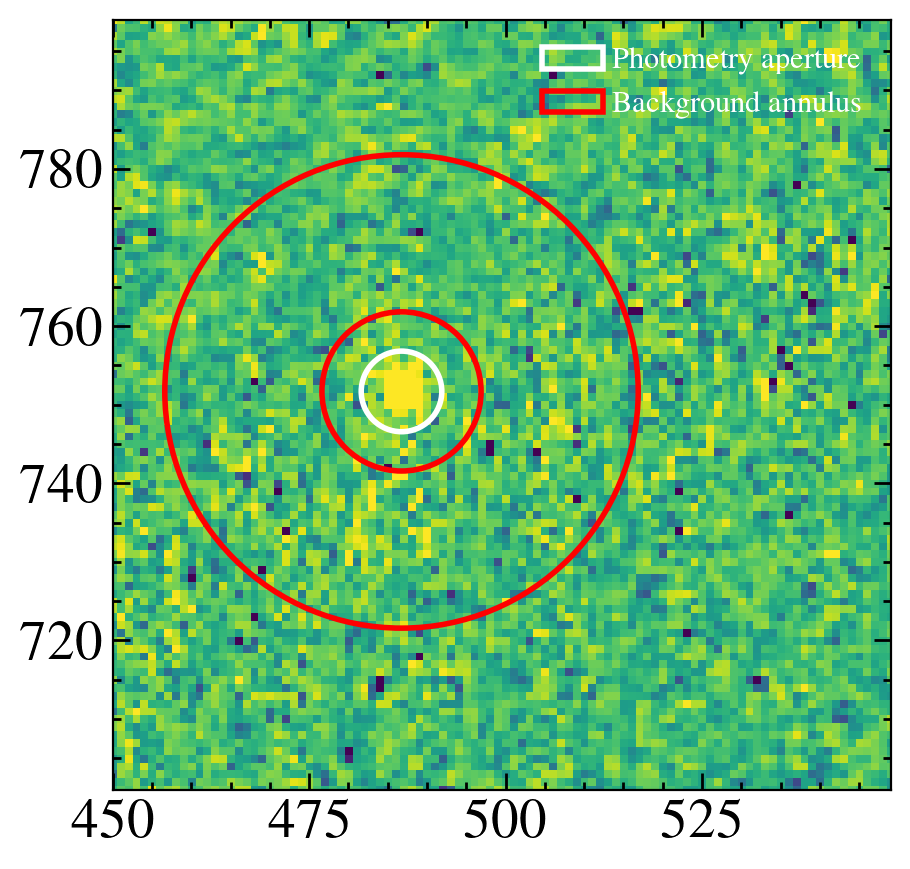

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03020_drc.fits
F280N
1770.0
   aperture_sum   
------------------
0.8435790041009896
5.949482013417142e-17 1.5865417712771342e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   486.8   751.7       0.8436          0.02183   0.02492              0.8187


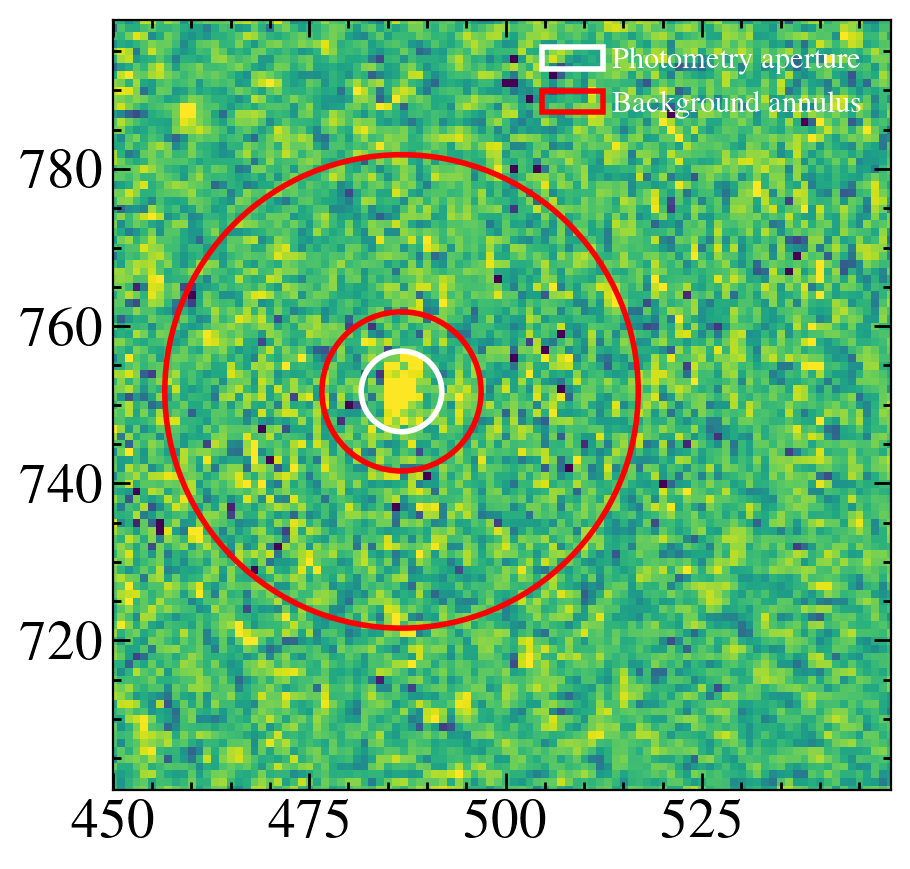

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03031_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.9961344080103579
5.779871616936174e-18 1.7327302391889318e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   486.8   751.7       0.9961          0.02905   0.02695              0.9692


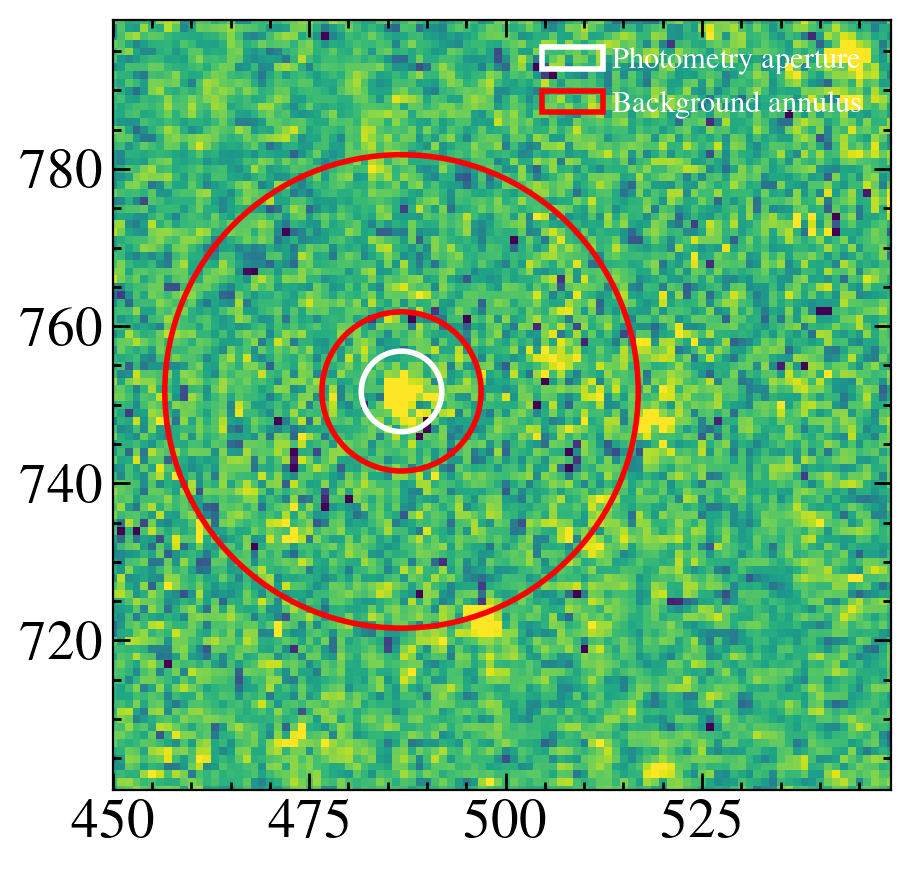

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03041_drc.fits
F225W
1180.0
    aperture_sum   
-------------------
0.49928437561703964
2.8228716681996275e-18 1.22672180164711e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   486.8   751.7       0.4993          0.02057   0.02594              0.4733


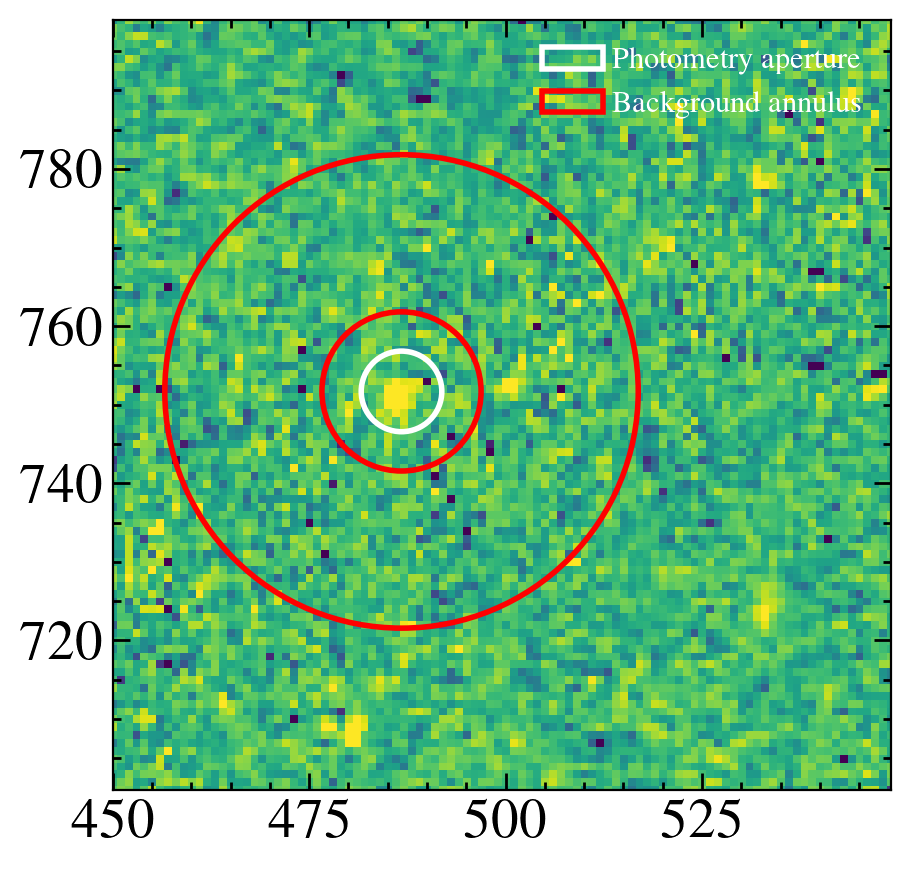

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03051_drc.fits
F225W
1180.0
   aperture_sum   
------------------
0.5874404026747927
3.3522620610390604e-18 1.3306202069540955e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1   486.8   751.7       0.5874          0.02231   0.02533              0.5621


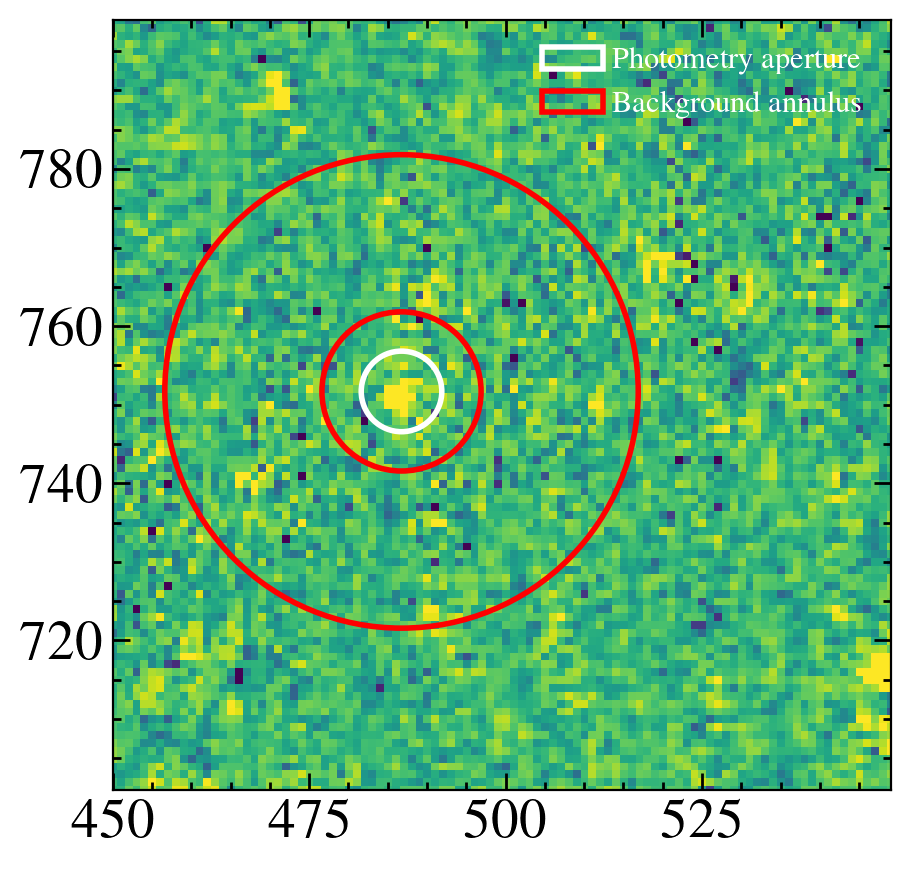

In [51]:
wfc3_pos = [(486.752, 751.70)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
for drc in drcs:
    print(drc)
    hdul = fits.open(drc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = np.nan_to_num(data, 0.0)
#     error = hdul[2].data
#     dq = hdul[3].data
#     mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(701, 799)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+25)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
    phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
    phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam /ee
    flux_err = phot_table['aperture_sum_err'][0]* photflam /ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

In [52]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
eetab

FILTER,WAVELENGTH,APER#0.04,APER#0.08,APER#0.12,APER#0.16,APER#0.20,APER#0.24,APER#0.28,APER#0.32,APER#0.36,APER#0.40,APER#0.44,APER#0.48,APER#0.51,APER#0.55,APER#0.59,APER#0.63,APER#0.67,APER#0.71,APER#0.75,APER#0.79,APER#0.83,APER#0.87,APER#0.91,APER#0.95,APER#0.99,APER#1.03,APER#1.07,APER#1.11,APER#1.15,APER#1.19,APER#1.23,APER#1.27,APER#1.31,APER#1.35,APER#1.39,APER#1.43,APER#1.47,APER#1.50,APER#1.54,APER#1.58,APER#1.62,APER#1.66,APER#1.70,APER#1.74,APER#1.78,APER#1.82,APER#1.86,APER#1.90,APER#1.94,APER#1.98,APER#6.0
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
FFFFF,2000.0,0.5713,0.6311,0.6845,0.7255,0.752,0.7757,0.7946,0.8086,0.8201,0.8312,0.8435,0.8558,0.8636,0.873,0.8817,0.8913,0.902,0.9129,0.9237,0.9337,0.9424,0.9499,0.9561,0.9614,0.966,0.9699,0.9733,0.9763,0.9788,0.981,0.9828,0.9843,0.9855,0.9865,0.9873,0.988,0.9886,0.989,0.9895,0.99,0.9904,0.9909,0.9913,0.9917,0.9921,0.9924,0.9928,0.9931,0.9935,0.9938,1.0
F218W,2223.7242894298383,0.5872,0.647,0.7001,0.7405,0.766,0.7886,0.8063,0.8194,0.8305,0.841,0.8521,0.863,0.8699,0.8784,0.8863,0.8949,0.9044,0.914,0.9235,0.9324,0.9401,0.9468,0.9525,0.9575,0.9618,0.9656,0.9691,0.9722,0.9749,0.9773,0.9794,0.9813,0.9828,0.9842,0.9854,0.9865,0.9874,0.988,0.9887,0.9894,0.99,0.9906,0.9911,0.9915,0.9919,0.9922,0.9926,0.9929,0.9932,0.9934,1.0
F225W,2358.3902256101073,0.6031,0.6628,0.7157,0.7555,0.78,0.8015,0.818,0.8303,0.8409,0.8508,0.8607,0.8702,0.8762,0.8838,0.8909,0.8986,0.9069,0.9152,0.9234,0.931,0.9378,0.9438,0.9489,0.9535,0.9576,0.9614,0.9648,0.968,0.9709,0.9736,0.976,0.9782,0.9802,0.9819,0.9835,0.9849,0.9862,0.987,0.988,0.9889,0.9896,0.9903,0.9909,0.9913,0.9917,0.9921,0.9924,0.9926,0.9929,0.9931,1.0
F275W,2703.297606591226,0.0639,0.295,0.5681,0.7241,0.79,0.8217,0.8389,0.8499,0.8583,0.8656,0.8722,0.8783,0.8826,0.8884,0.8946,0.9008,0.9065,0.912,0.9173,0.9225,0.9275,0.9324,0.9371,0.9417,0.9459,0.95,0.9536,0.9569,0.9599,0.9626,0.9649,0.967,0.9689,0.9705,0.972,0.9733,0.9745,0.9753,0.9764,0.9773,0.9782,0.979,0.9798,0.9805,0.9812,0.9818,0.9824,0.983,0.9835,0.984,1.0
F300X,2805.8406941029884,0.24029,0.54924,0.70461,0.77454,0.81001,0.83034,0.84388,0.85413,0.86251,0.86973,0.87606,0.88211,0.88814,0.89416,0.90025,0.90629,0.91201,0.91738,0.92268,0.92789,0.93306,0.93813,0.94289,0.94718,0.95122,0.95509,0.9588,0.9621,0.96487,0.96745,0.9698,0.97187,0.97376,0.97563,0.97718,0.97982,0.98259,0.98505,0.98564,0.98622,0.98681,0.9874,0.98799,0.98858,0.98916,0.98975,0.99034,0.99093,0.99152,0.9921,1.0
F280N,2829.9788818500247,0.27019,0.5746,0.71539,0.78092,0.81427,0.8329,0.84566,0.85563,0.86369,0.87069,0.87688,0.8818,0.88687,0.89218,0.89723,0.90212,0.90763,0.91256,0.91684,0.92161,0.92704,0.9322,0.93738,0.94274,0.94732,0.95172,0.95569,0.95976,0.96335,0.96678,0.96984,0.97276,0.97453,0.97543,0.9767,0.97964,0.98244,0.98493,0.98552,0.98612,0.98671,0.9873,0.9879,0.98849,0.98908,0.98968,0.99027,0.99087,0.99146,0.99205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F763M,7612.744622820045,0.26773,0.55477,0.7152,0.81145,0.84248,0.85692,0.87002,0.88439,0.89693,0.90387,0.90954,0.91542,0.92223,0.92819,0.93206,0.93516,0.93845,0.94164,0.94411,0.94662,0.9492,0.95133,0.95338,0.95513,0.95628,0.9567,0.95778,0.95889,0.95942,0.95955,0.95992,0.96149,0.96251,0.96333,0.96488,0.96589,0.96691,0.96787,0.96855,0.96924,0.96992,0.9706,0.97128,0.97197,0.97265,0.97333,0.97401,0.9747,0.97538,0.97606,1.0
F775W,7648.3046091546,0.26053,0.54776,0.70804,0.80632,0.84195,0.85724,0.8703,0.88415,0.89622,0.90392,0.9

In [53]:
0.4/0.039

10.256410256410257

In [54]:
340e-18*1.5

5.1e-16

In [55]:
mpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/TRAPPIST-1/'

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
mask = (wn > 2300) & (wn < 3000)
wn, fn, en = wn[mask], fn[mask], en[mask]



['F275W', 'F280N', 'F225W', 'F225W', 'F225W'] [5.142773595777662e-18, 5.949482013417142e-17, 5.779871616936174e-18, 2.8228716681996275e-18, 3.3522620610390604e-18] [1.0953960109722057e-19, 1.5865417712771342e-18, 1.7327302391889318e-19, 1.22672180164711e-19, 1.3306202069540955e-19] [46.94898963 37.49968719 33.35701938 23.01150648 25.19322977]


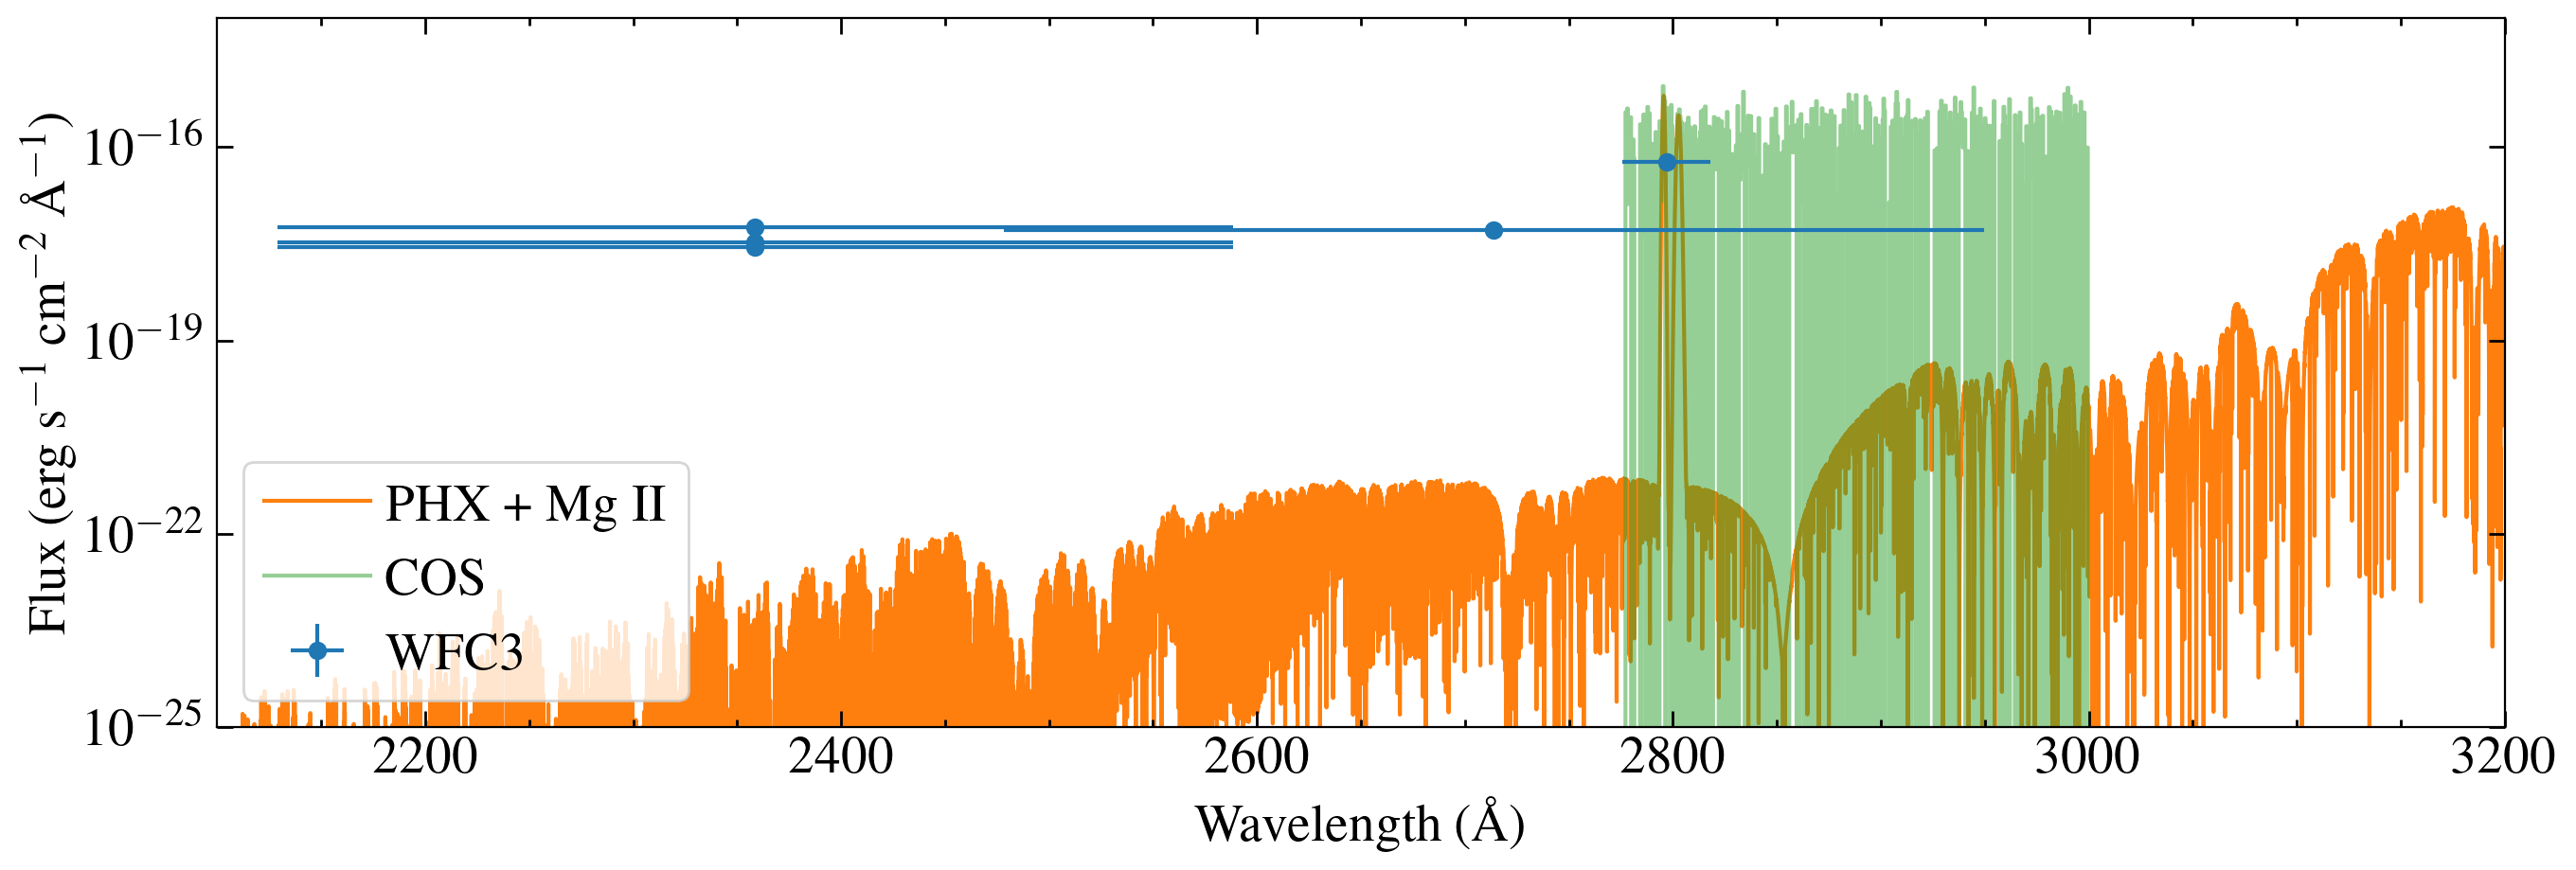

In [56]:
print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])
# bands = ['F275W', 'F280N', 'F225W']

fig, ax=plt.subplots()

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='PHX + Mg II')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, xerr=widths/2, marker='o', ls='none', label='WFC3', zorder=10, c='C0')
 
ax.legend(frameon=True, loc=3)
    
plt.yscale('log')
plt.ylim(1e-25, 1e-14)
plt.xlim(2100, 3200)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()



Need to integrate the model over the fliters so I'm sure it's not just the Mg II lines... pysynphot doesn't work for python 3.10, have to do it by hand.

In [57]:
def make_phot(bp_w, bp_cc, w, f):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
    return np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)

In [58]:
bands= glob.glob('filters/*UVIS*')
bands

['filters/HST_WFC3_UVIS2.F275W.dat',
 'filters/HST_WFC3_UVIS2.F225W.dat',
 'filters/HST_WFC3_UVIS2.F280N.dat']

In [59]:
phot_w = np.array([2713.86, 2358.7, 2796.94])
phot_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, f)
    phot_f.append(phot)
print(phot_f)

[1.791268145160082e-18, 1.5468124773685447e-19, 2.8340546061028076e-17]


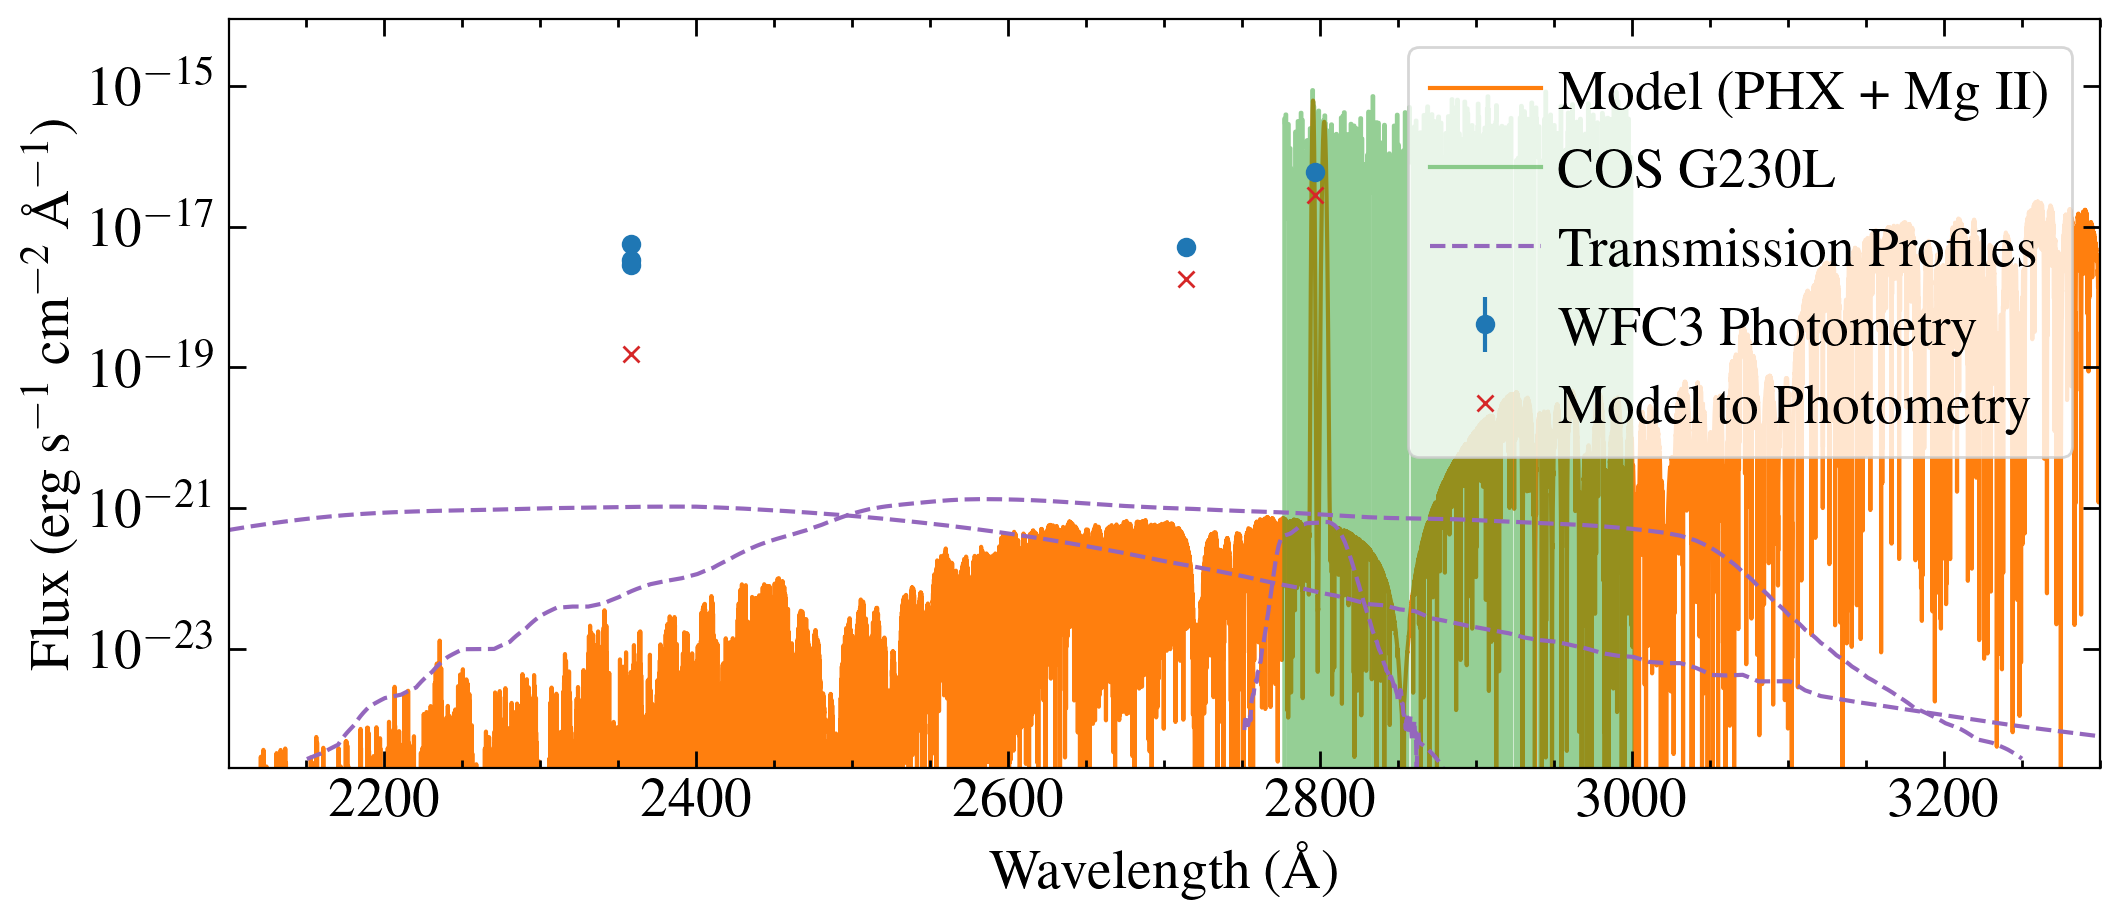

In [60]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])

fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')


# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2101, 3300)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/t1_wfc3_epoch{}_1stlook.pdf'.format(epoch))
fig.savefig('plots/t1_wfc3_epoch{}_1stlook.png'.format(epoch), facecolor='w')

Next step - work out the timings/subexposures of the photometry.

In [61]:


mids = (starts + ends) / 2
halfs = (mids - starts)*u.d.to(u.min)
mids0 = (mids-min(starts))*u.d.to(u.min)

<ErrorbarContainer object of 3 artists>

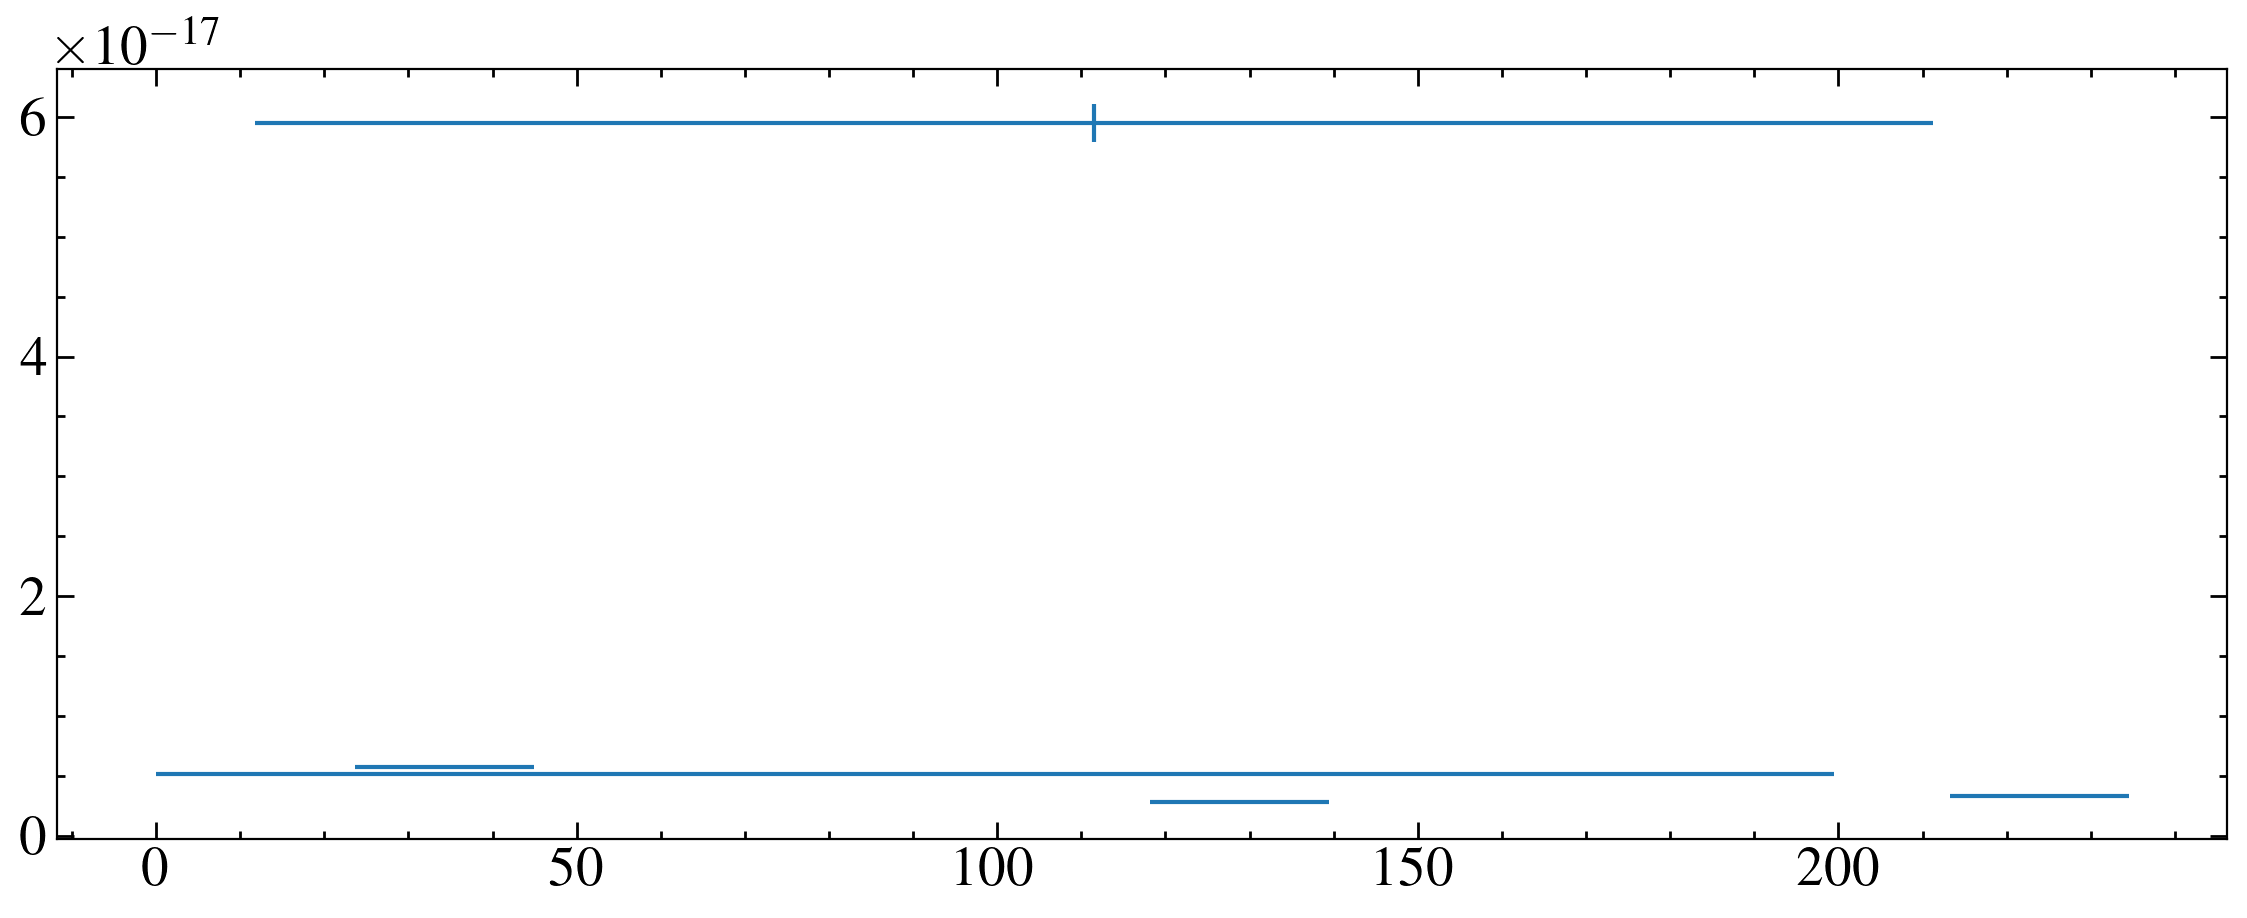

In [62]:
plt.errorbar(mids0, fluxes, yerr=flux_errs, xerr=halfs, ls='none')

All over the place? Look at individual flt images?

In [63]:
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yzq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z0q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zcq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zeq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z8q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z2q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z7q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zdq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z9q_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zaq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zbq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yvq_flc.fits']

In [64]:
def make_PAMcorr_image_UVIS(data, scihdr, pamdir):
    """
    Corrects the geometric distortion of the input image
    data by multiplying by the correct UVIS PAM.
    Parameters
    ----------
    data : array
        Image data before correction.
    scihdr : header
        Header from science extension of data.
    pamdir : str
        Path to where pixel area maps for UVIS1 and/or
        UVIS2 are located.
    Returns
    -------
    pamcorr_data : array
        PAM-corrected data.
    """

    data = np.copy(data)
    x0 = int(np.abs(scihdr['LTV1']))
    y0 = int(np.abs(scihdr['LTV2']))
    x1 = int(x0 + scihdr['NAXIS1'])
    y1 = int(y0 + scihdr['NAXIS2'])
    

    if scihdr['CCDCHIP'] == 1:
        pam = fits.getdata(pamdir + 'UVIS1wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]

    elif scihdr['CCDCHIP'] == 2:
        pam = fits.getdata(pamdir + 'UVIS2wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]
    else:
        raise Exception('Chip case not handled.')

    return pamcorr_data

In [84]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flc in flcs:
    hdr = fits.getheader(flc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flcs)):
    print('{} & WFC3/UVIS & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

if3i03yvq F275W 60125.72009602 590.0
if3i03yzq F280N 60125.72827898 590.0
if3i03z0q F225W 60125.73649639 590.0
if3i03z2q F225W 60125.74444787 590.0
if3i03z7q F275W 60125.78574417 590.0
if3i03z8q F280N 60125.79392676 590.0
if3i03z9q F225W 60125.80214454 590.0
if3i03zaq F225W 60125.81009602 590.0
if3i03zbq F275W 60125.85177417 590.0
if3i03zcq F280N 60125.85995713 590.0
if3i03zdq F225W 60125.86817454 590.0
if3i03zeq F225W 60125.87612602 590.0
2023-06-30 & WFC3/UVIS & F275W & 60125.72009602 & 590.0 & if3i03yvq & IF3I03010 \\
2023-06-30 & WFC3/UVIS & F280N & 60125.72827898 & 590.0 & if3i03yzq & IF3I03020 \\
2023-06-30 & WFC3/UVIS & F225W & 60125.73649639 & 590.0 & if3i03z0q & IF3I03030 \\
2023-06-30 & WFC3/UVIS & F225W & 60125.74444787 & 590.0 & if3i03z2q & IF3I03030 \\
2023-06-30 & WFC3/UVIS & F275W & 60125.78574417 & 590.0 & if3i03z7q & IF3I03010 \\
2023-06-30 & WFC3/UVIS & F280N & 60125.79392676 & 590.0 & if3i03z8q & IF3I03020 \\
2023-06-30 & WFC3/UVIS & F225W & 60125.80214454 & 590.0 & 

Redoing photometry with flc files 

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yvq_flc.fits
F275W
590.0
   aperture_sum  
-----------------
797.3495772469536
5.076218502713886e-18 3.475641390729462e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        797.3            49.58     73.26               724.1


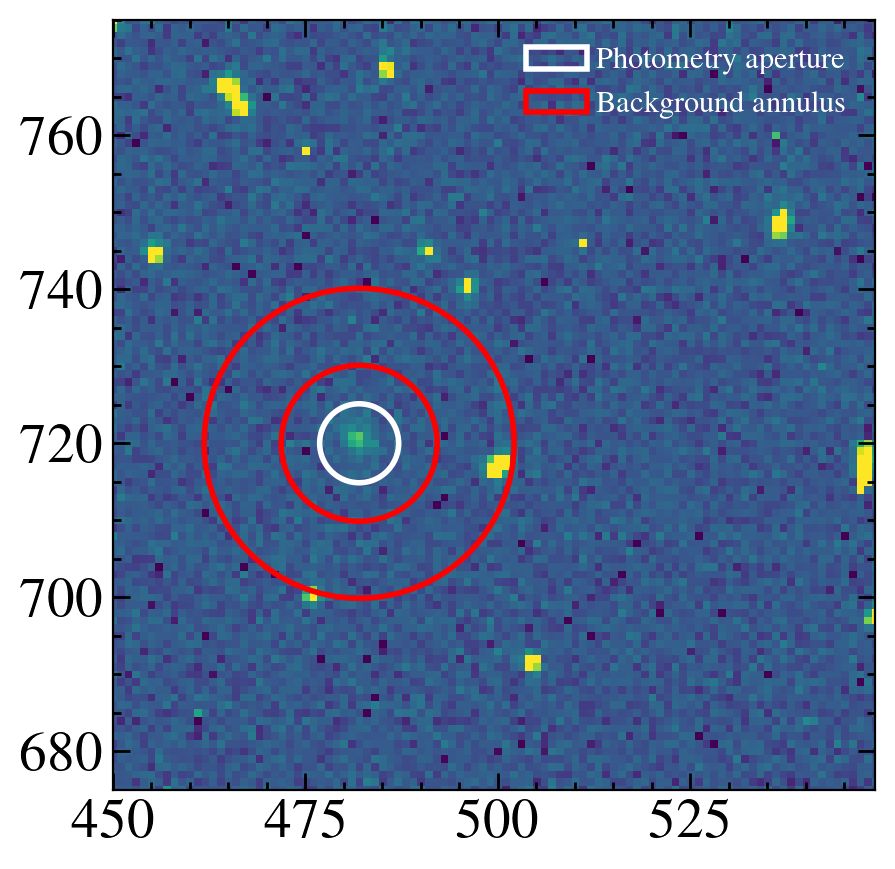

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03yzq_flc.fits
F280N
590.0
   aperture_sum  
-----------------
409.4266103105458
4.73240621152578e-17 5.8106676735917564e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        409.4            47.17     25.23               384.2


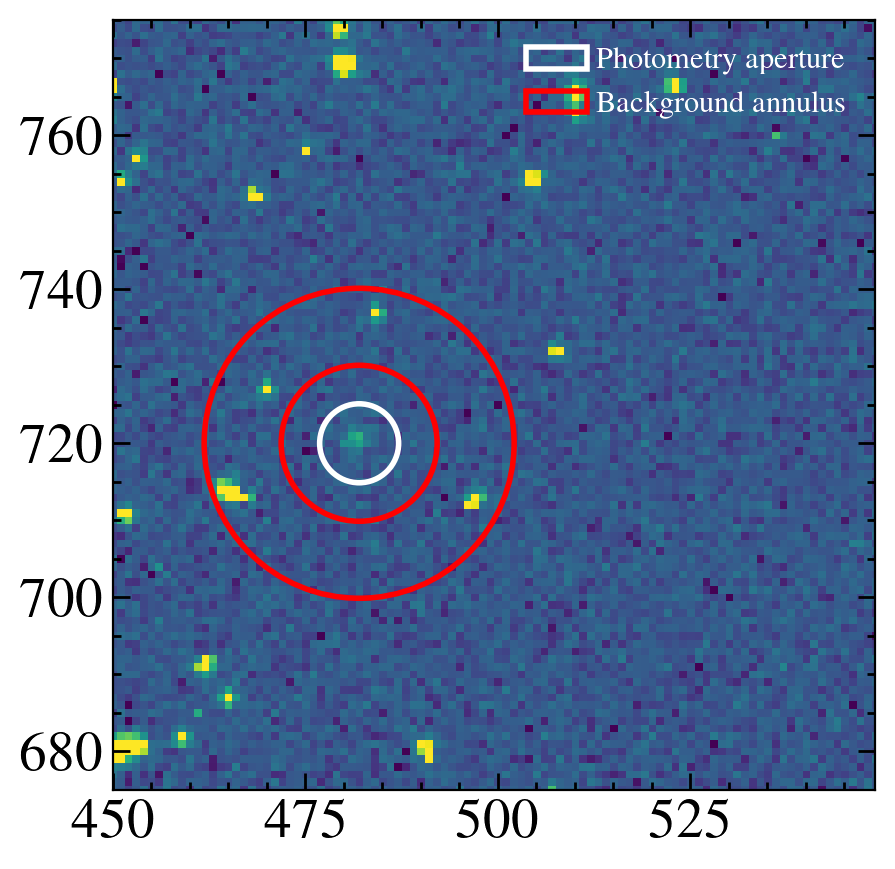

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z0q_flc.fits
F225W
590.0
   aperture_sum  
-----------------
535.1348856801669
4.797236159777192e-18 4.1484452587990534e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        535.1            41.04     60.53               474.6


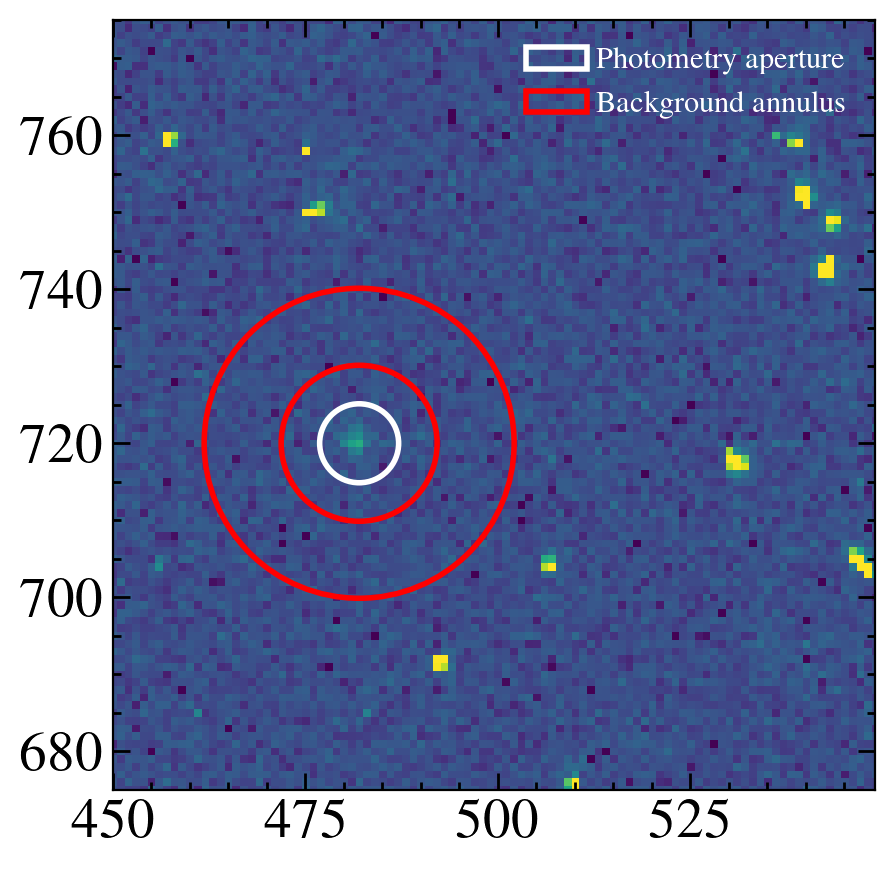

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z2q_flc.fits
F225W
590.0
   aperture_sum  
-----------------
798.5224920904901
6.936905416867542e-18 4.372378121058122e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        798.5            43.26     112.2               686.3


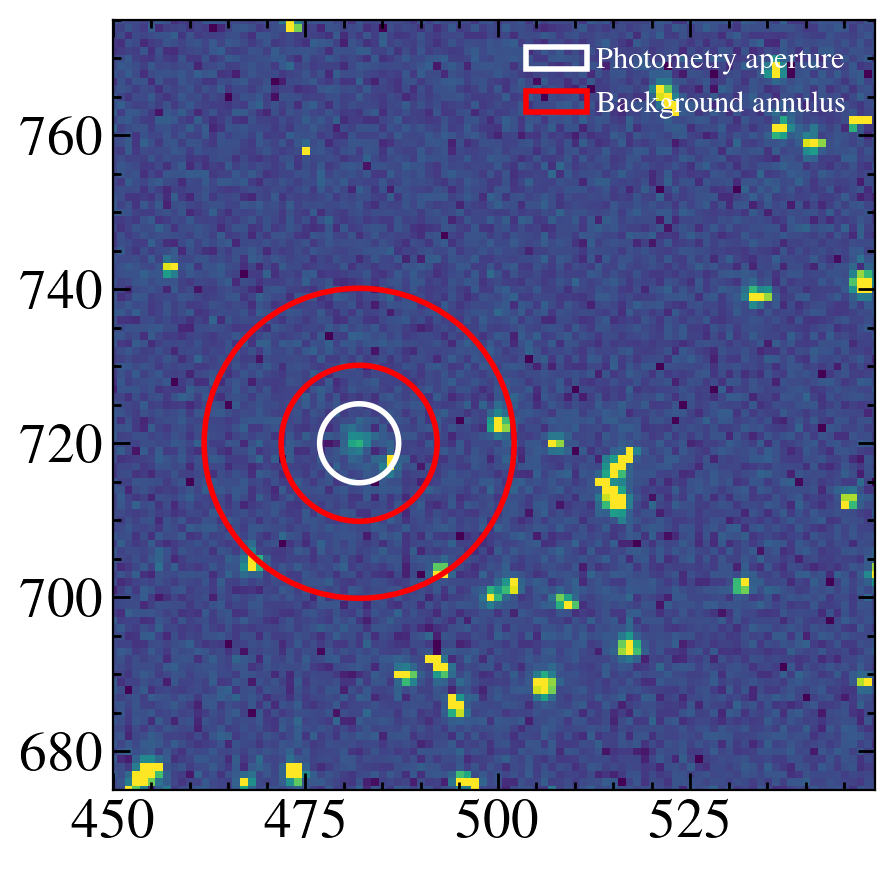

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z7q_flc.fits
F275W
590.0
   aperture_sum  
-----------------
567.0176623252152
3.5968073180814925e-18 3.340102243761481e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720          567            47.64     53.96               513.1


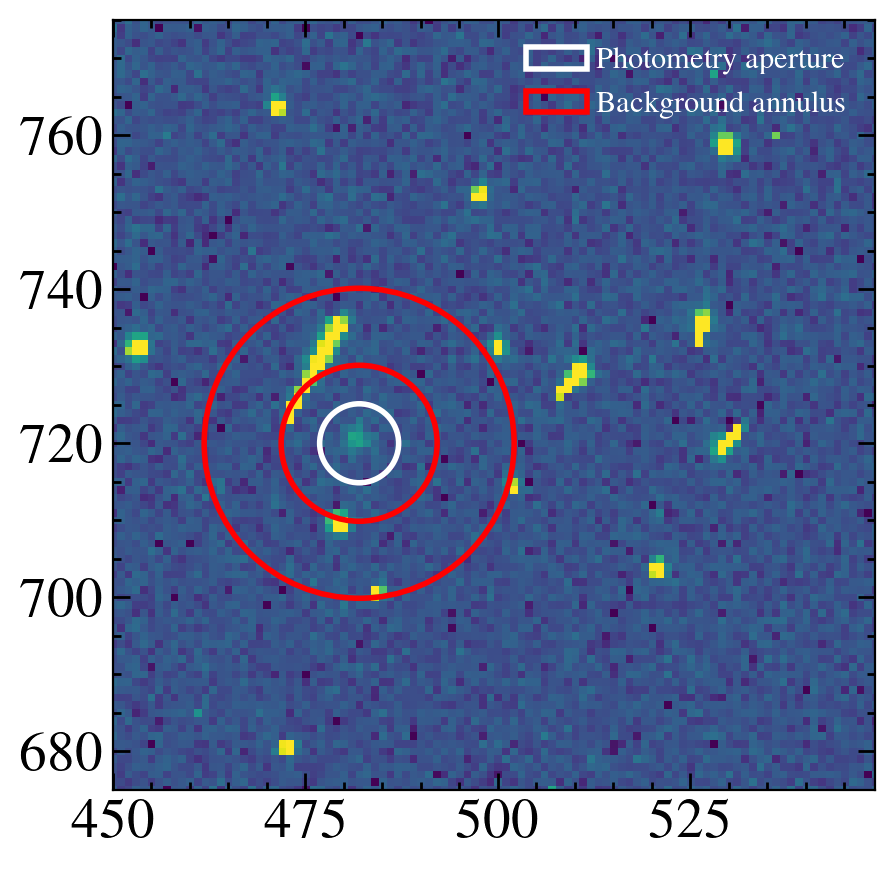

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z8q_flc.fits
F280N
590.0
   aperture_sum  
-----------------
397.6806053661061
4.6469739360995486e-17 5.826931816855189e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        397.7            47.31     20.42               377.3


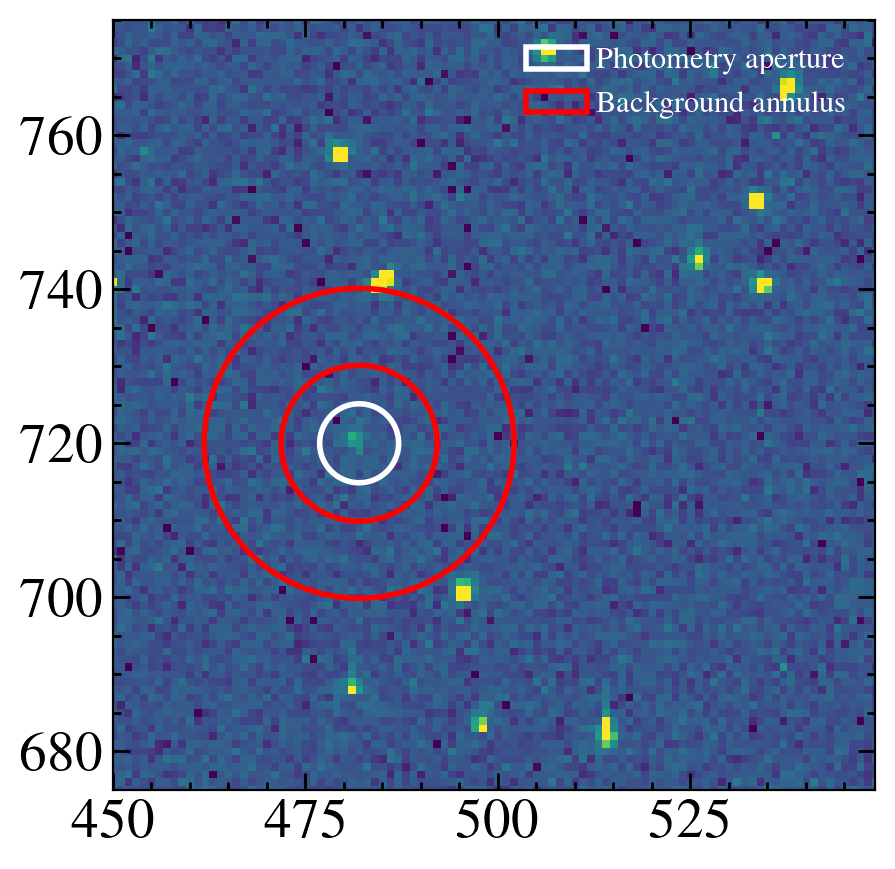

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03z9q_flc.fits
F225W
590.0
   aperture_sum   
------------------
376.71203826552943
3.1800176359376062e-18 4.0040233884457416e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        376.7            39.61      62.1               314.6


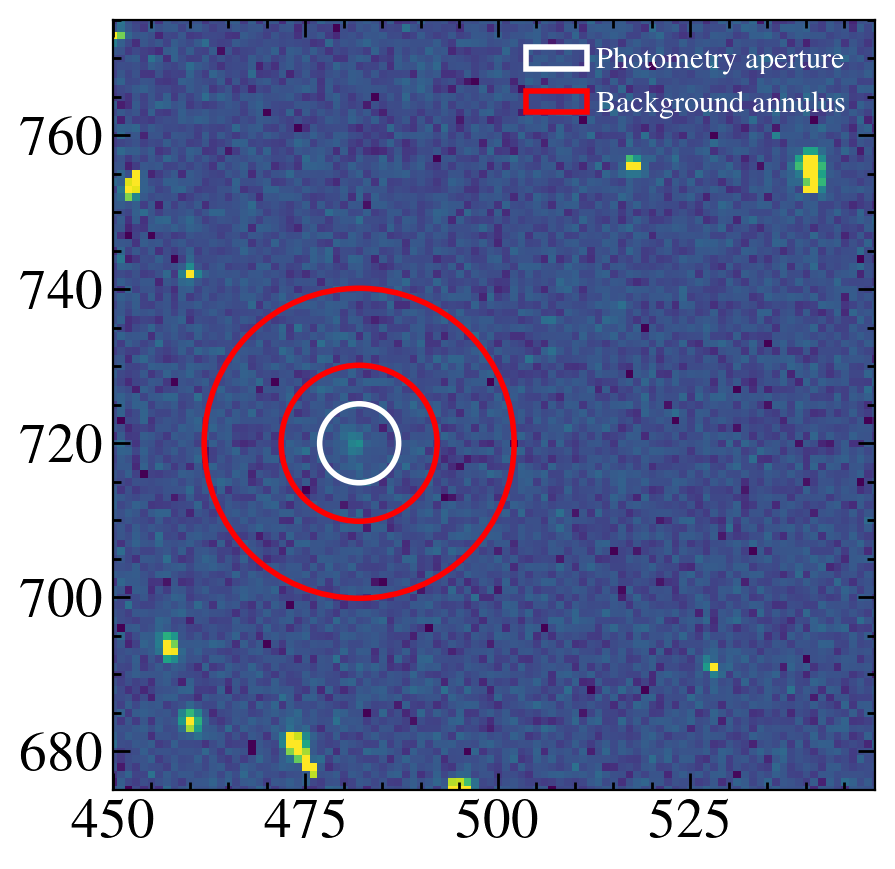

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zaq_flc.fits
F225W
590.0
  aperture_sum  
----------------
362.950289857119
1.9962043117932628e-18 4.0006654260069443e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720          363            39.58     165.5               197.5


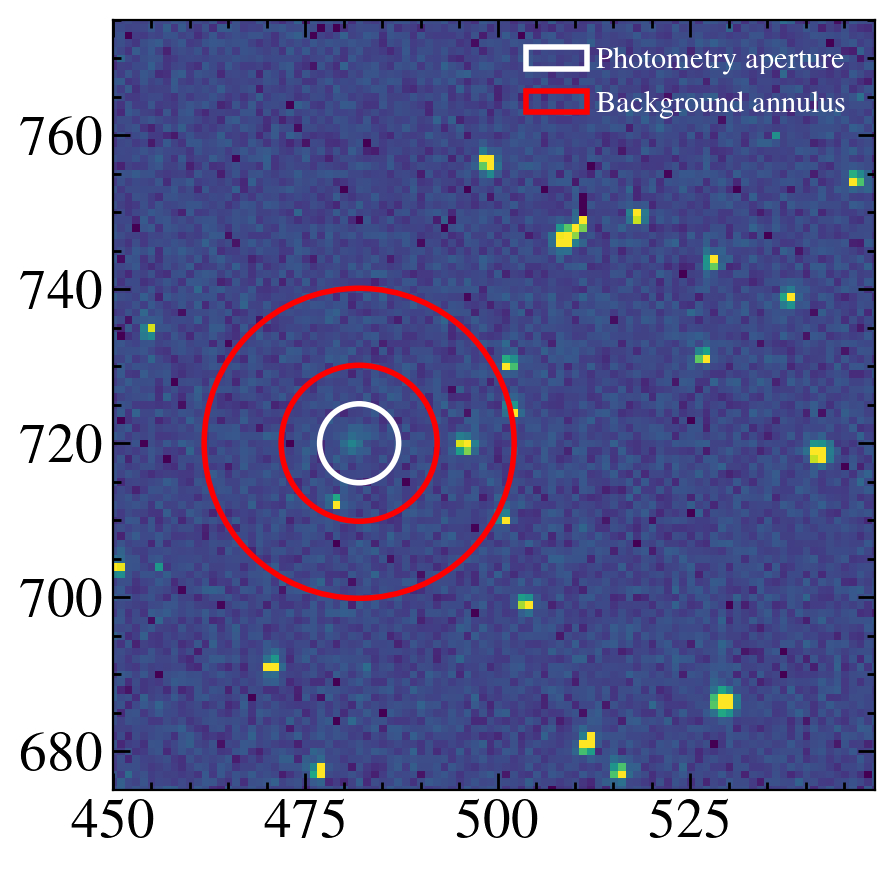

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zbq_flc.fits
F275W
590.0
   aperture_sum  
-----------------
776.9038746895055
4.866609000072878e-18 3.4141827967870627e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        776.9             48.7     82.72               694.2


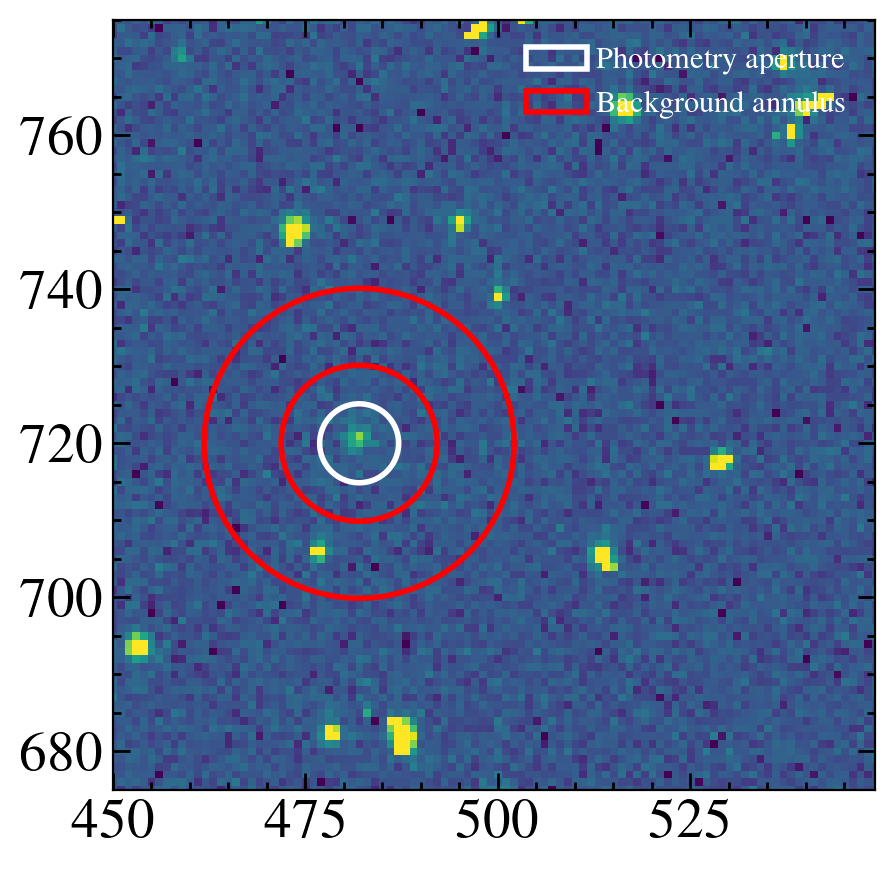

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zcq_flc.fits
F280N
590.0
   aperture_sum  
-----------------
553.3376536021198
6.45252646521432e-17 5.8637042687611135e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        553.3             47.6     29.49               523.8


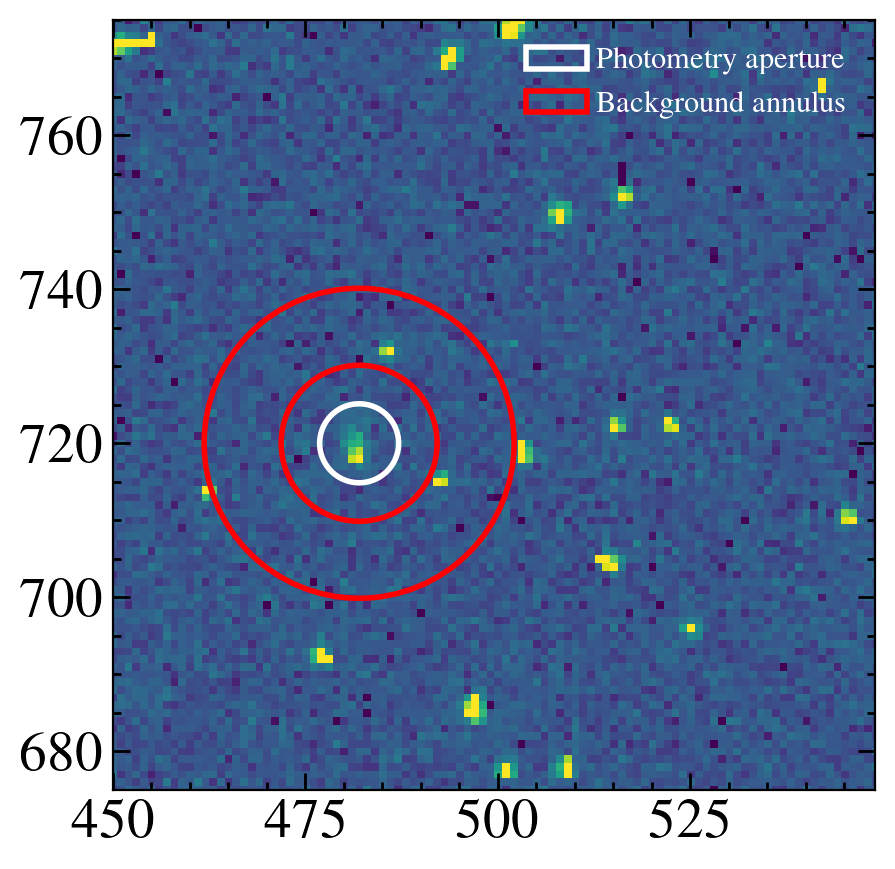

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zdq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
359.0231329724448
2.9904915213023278e-18 3.9399178257535455e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720          359            38.98     63.17               295.9


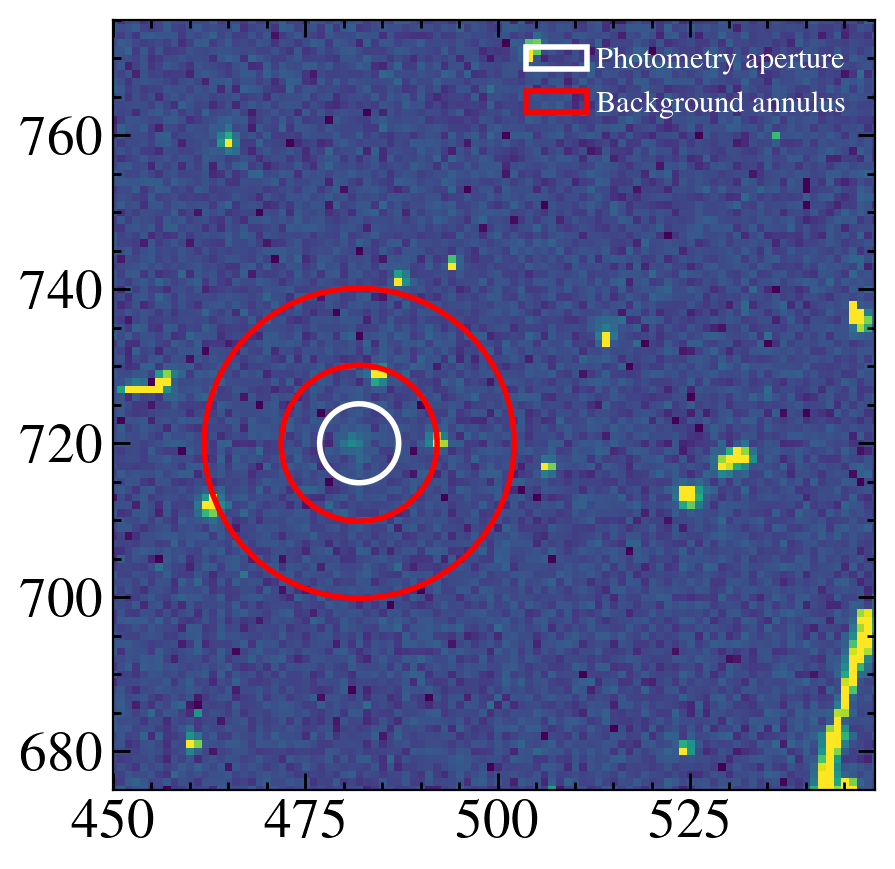

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/wfc3/if3i03zeq_flc.fits
F225W
590.0
   aperture_sum   
------------------
454.57967362319494
3.296427983409779e-18 4.1492734651412156e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     482     720        454.6            41.05     128.5               326.1


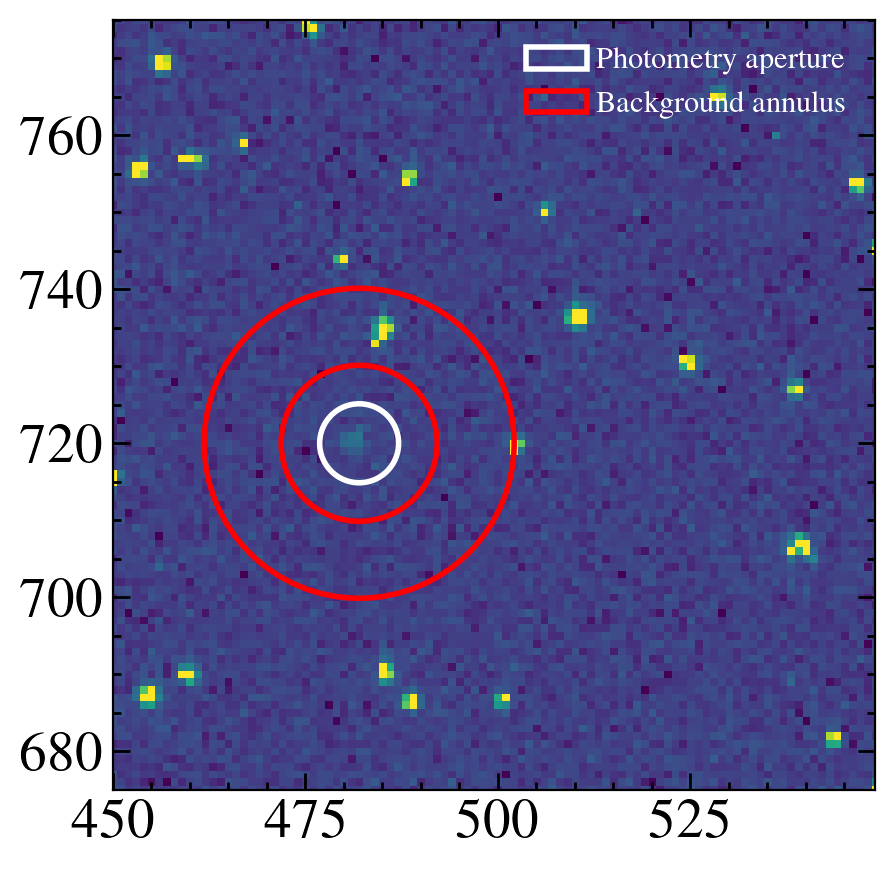

In [85]:
# wfc3_pos = [(489.752, 751.70)]
wfc3_pos = [(482, 720)]
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
flcsort = np.array(flcs)[args]
for flc in flcsort:
    print(flc)
    hdul = fits.open(flc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(675, 775)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME'])
savdat.write('results/epoch{}_wfc3_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [67]:
# plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
# plt.y

In [68]:
# filters

Text(0, 0.5, 'Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \\AA$^{-1}$)')

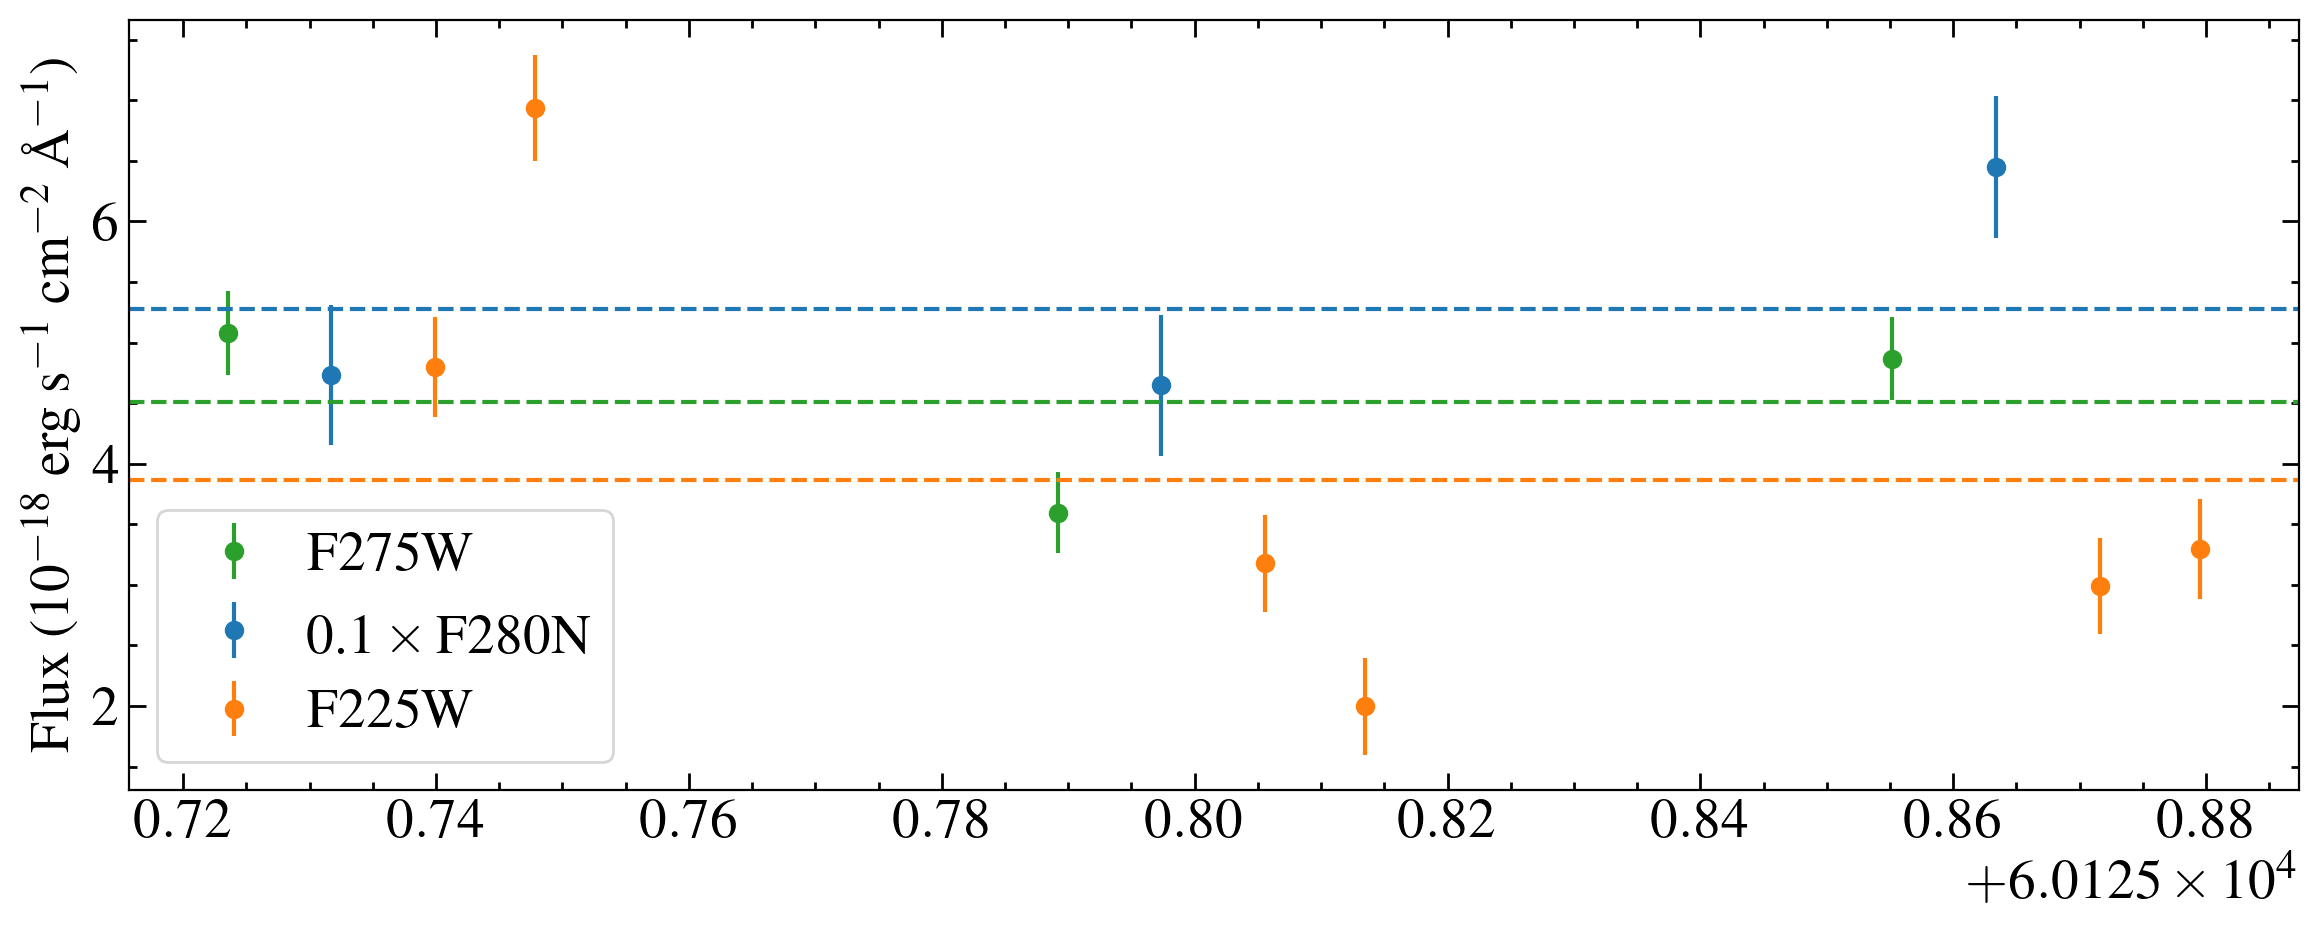

In [86]:
fig, ax=plt.subplots()

f280n = []
f275w = []
f225w= []

for i in range(len(starts)):
    time = starts[i] + ((expt[i]/2)/86400)
    if filters[i] == 'F280N':
        f280n.append(fluxes[i]*1e17)
        plt.errorbar(time, fluxes[i]*1e17, yerr=flux_errs[i]*1e17, ls='none',marker='o', c='C0', label=r'0.1\,$\times$\,F280N')
    elif filters[i] == 'F225W':
        f225w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C1', label='F225W')
    if filters[i] == 'F275W':
        f275w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C2', label='F275W')

plt.axhline(np.mean(f280n), ls='--', c='C0')
plt.axhline(np.mean(f225w), ls='--', c='C1')
plt.axhline(np.mean(f275w), ls='--', c='C2')

# plt.axhline(np.median(f280n), ls='-.', c='C0')
# plt.axhline(np.median(f225w), ls='-.', c='C1')
# plt.axhline(np.median(f275w), ls='-.', c='C2')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=3) 

ax.set_ylabel('Time (MJD)')
ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

In [70]:
for i in range(len(starts)):
    print(filters[i], fluxes[i], flux_errs[i],  fluxes[i]/flux_errs[i])

F275W 5.076218502713886e-18 3.475641390729462e-19 14.605127319100367
F280N 4.73240621152578e-17 5.8106676735917564e-18 8.144341541047952
F225W 4.797236159777192e-18 4.1484452587990534e-19 11.56393747658119
F225W 6.936905416867542e-18 4.372378121058122e-19 15.865291666926558
F275W 3.5968073180814925e-18 3.340102243761481e-19 10.768554539908099
F280N 4.6469739360995486e-17 5.826931816855189e-18 7.974992812954405
F225W 3.1800176359376062e-18 4.0040233884457416e-19 7.942055596163755
F225W 1.9962043117932628e-18 4.0006654260069443e-19 4.989680713654853
F275W 4.866609000072878e-18 3.4141827967870627e-19 14.25409619148872
F280N 6.45252646521432e-17 5.8637042687611135e-18 11.004181264035019
F225W 2.9904915213023278e-18 3.9399178257535455e-19 7.590238308410325
F225W 3.296427983409779e-18 4.1492734651412156e-19 7.944590808737136


In [71]:
np.array(fluxes)/flux_errs

array([14.60512732,  8.14434154, 11.56393748, 15.86529167, 10.76855454,
        7.97499281,  7.9420556 ,  4.98968071, 14.25409619, 11.00418126,
        7.59023831,  7.94459081])

In [72]:
300*u.ks.to(u.d)

3.472222222222222

I should really try to look at ACS...

In [73]:
apath

'/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/'

In [74]:
drzs = glob.glob('{}*drz.fits'.format(apath))
drzs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04011_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04021_drz.fits']

In [75]:
roots = []
bands = []
times = []
expt = []
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
roots, bands, times, expt = np.array(roots), np.array(bands), np.array(times), np.array(expt)    
args = np.argsort(times)
roots, bands, times, expt = roots[args], bands[args], times[args], expt[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

jf3i04011 F150LP 60125.91830393 2600.0
jf3i04021 F165LP 60125.98419467 2600.0


[None, None]

In [76]:
flts = glob.glob('{}*flt.fits'.format(apath))
flts


['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04zgq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04zhq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04ziq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04zjq_flt.fits']

In [77]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flt in flts:
    hdr = fits.getheader(flt, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flts)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

jf3i04zgq F150LP 60125.91830393 1300.0
jf3i04zhq F150LP 60125.93381319 1300.0
jf3i04ziq F165LP 60125.98419467 1300.0
jf3i04zjq F165LP 60125.99970393 1300.0
2023-06-30 & ACS/SBC & F150LP & 60125.91830393 & 1300.0 & jf3i04zgq & JF3I04010 \\
2023-06-30 & ACS/SBC & F150LP & 60125.93381319 & 1300.0 & jf3i04zhq & JF3I04010 \\
2023-06-30 & ACS/SBC & F165LP & 60125.98419467 & 1300.0 & jf3i04ziq & JF3I04020 \\
2023-06-30 & ACS/SBC & F165LP & 60125.99970393 & 1300.0 & jf3i04zjq & JF3I04020 \\


/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04zgq_flt.fits
F150LP
1300.0
   aperture_sum  
-----------------
43.87051037335253
1.8322647932662436e-18 6.097811943084873e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        43.87             14.6         0               43.87


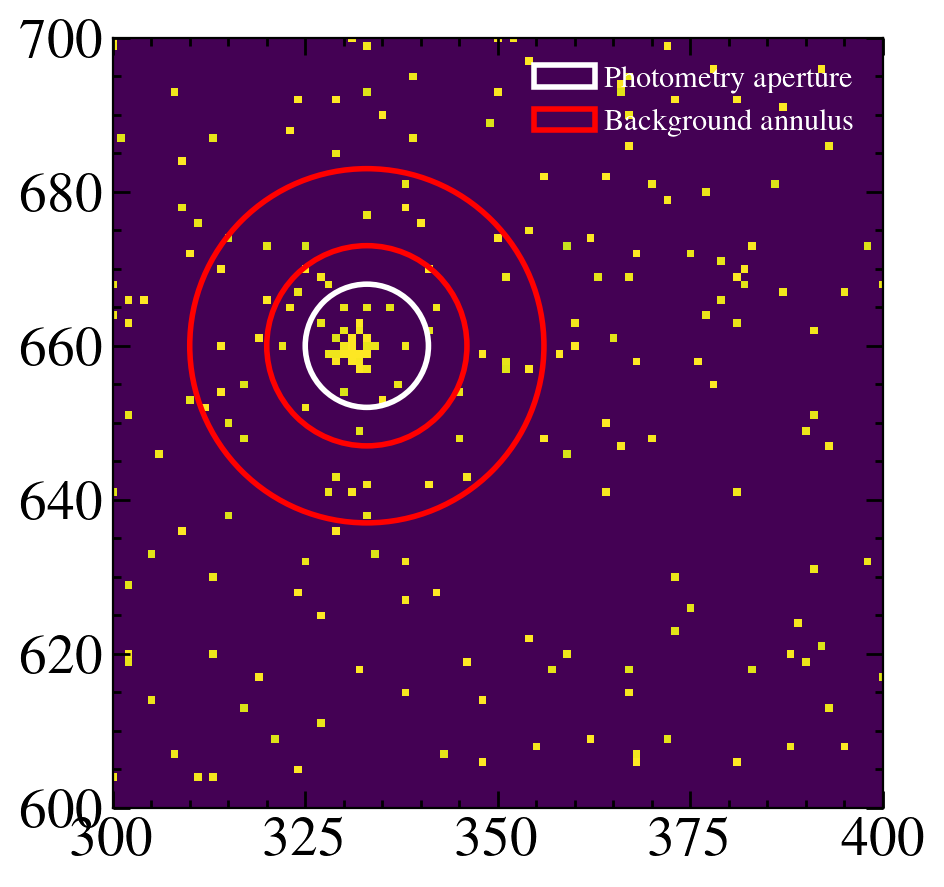

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04zhq_flt.fits
F150LP
1300.0
   aperture_sum  
-----------------
39.24245587926599
1.638972733550815e-18 6.081224951187688e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        39.24            14.56         0               39.24


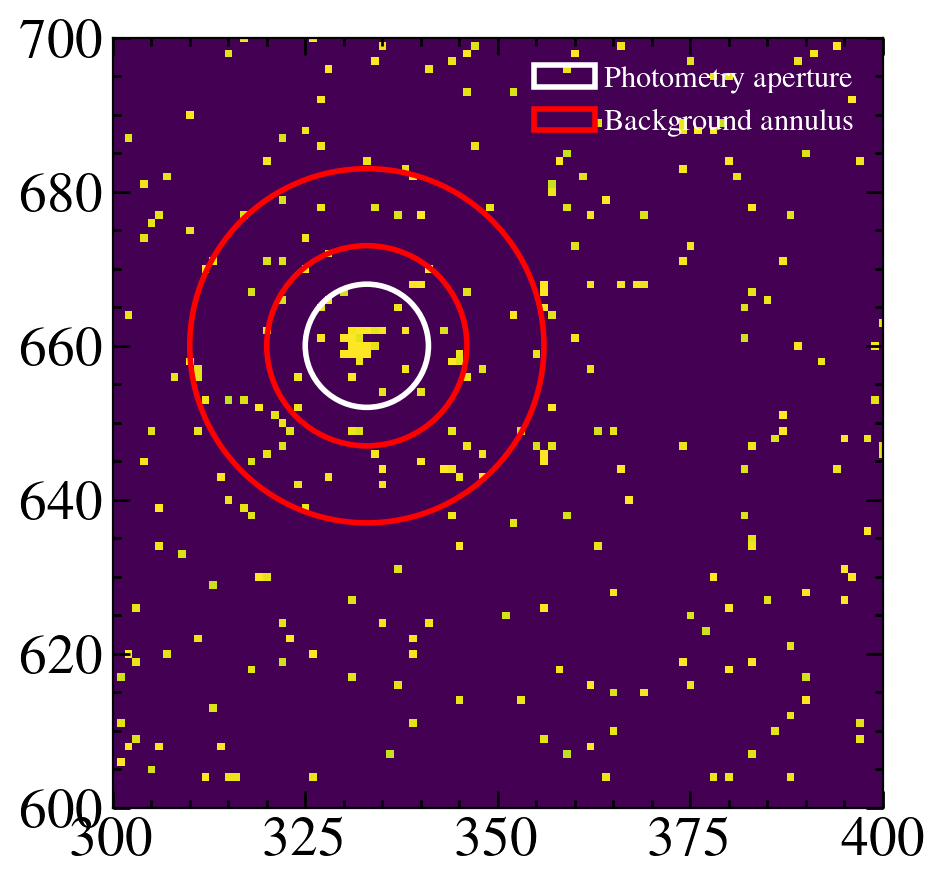

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04ziq_flt.fits
F165LP
1300.0
   aperture_sum   
------------------
16.737250711914598
2.387114432360734e-18 2.0131901213345025e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        16.74            14.12         0               16.74


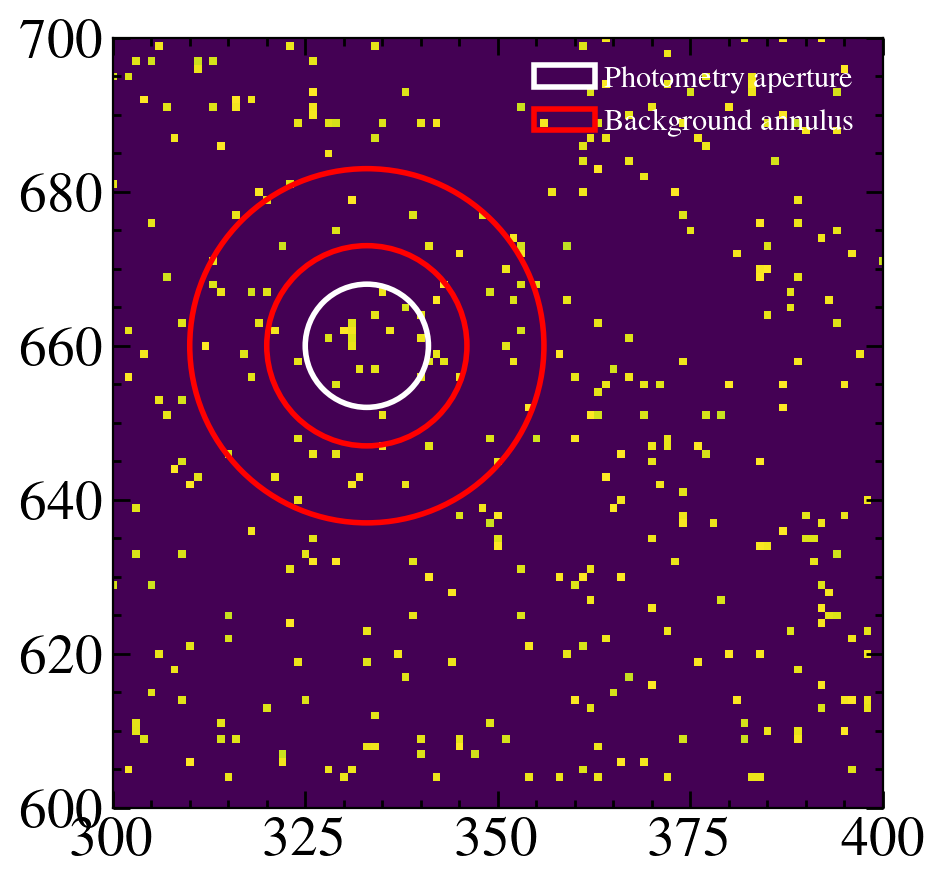

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04zjq_flt.fits
F165LP
1300.0
   aperture_sum   
------------------
15.630426943302155
2.2292560697412483e-18 2.0178340881352498e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        15.63            14.15         0               15.63


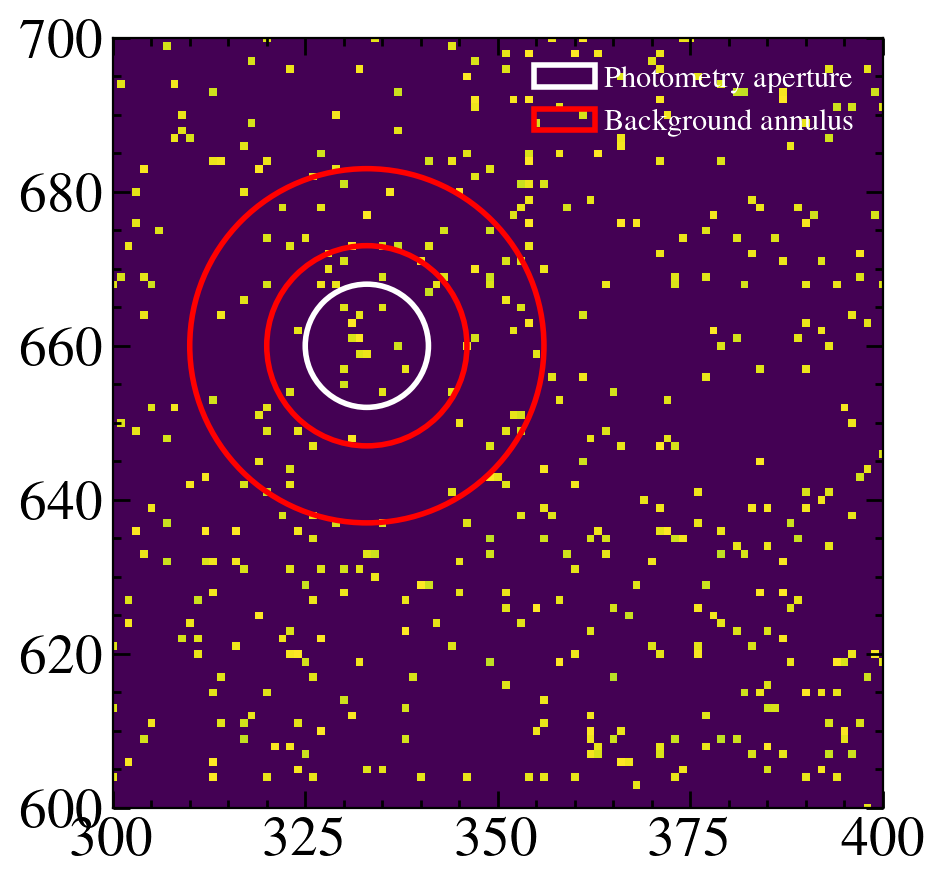

In [78]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(333, 660)]
pixscale = 0.025
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
fltsort = np.array(flts)[args]
for flt in fltsort:
    print(flt)
    hdul = fits.open(flt)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(300, 400)
    plt.ylim(600, 700)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
#     ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
    ee = 0.65
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

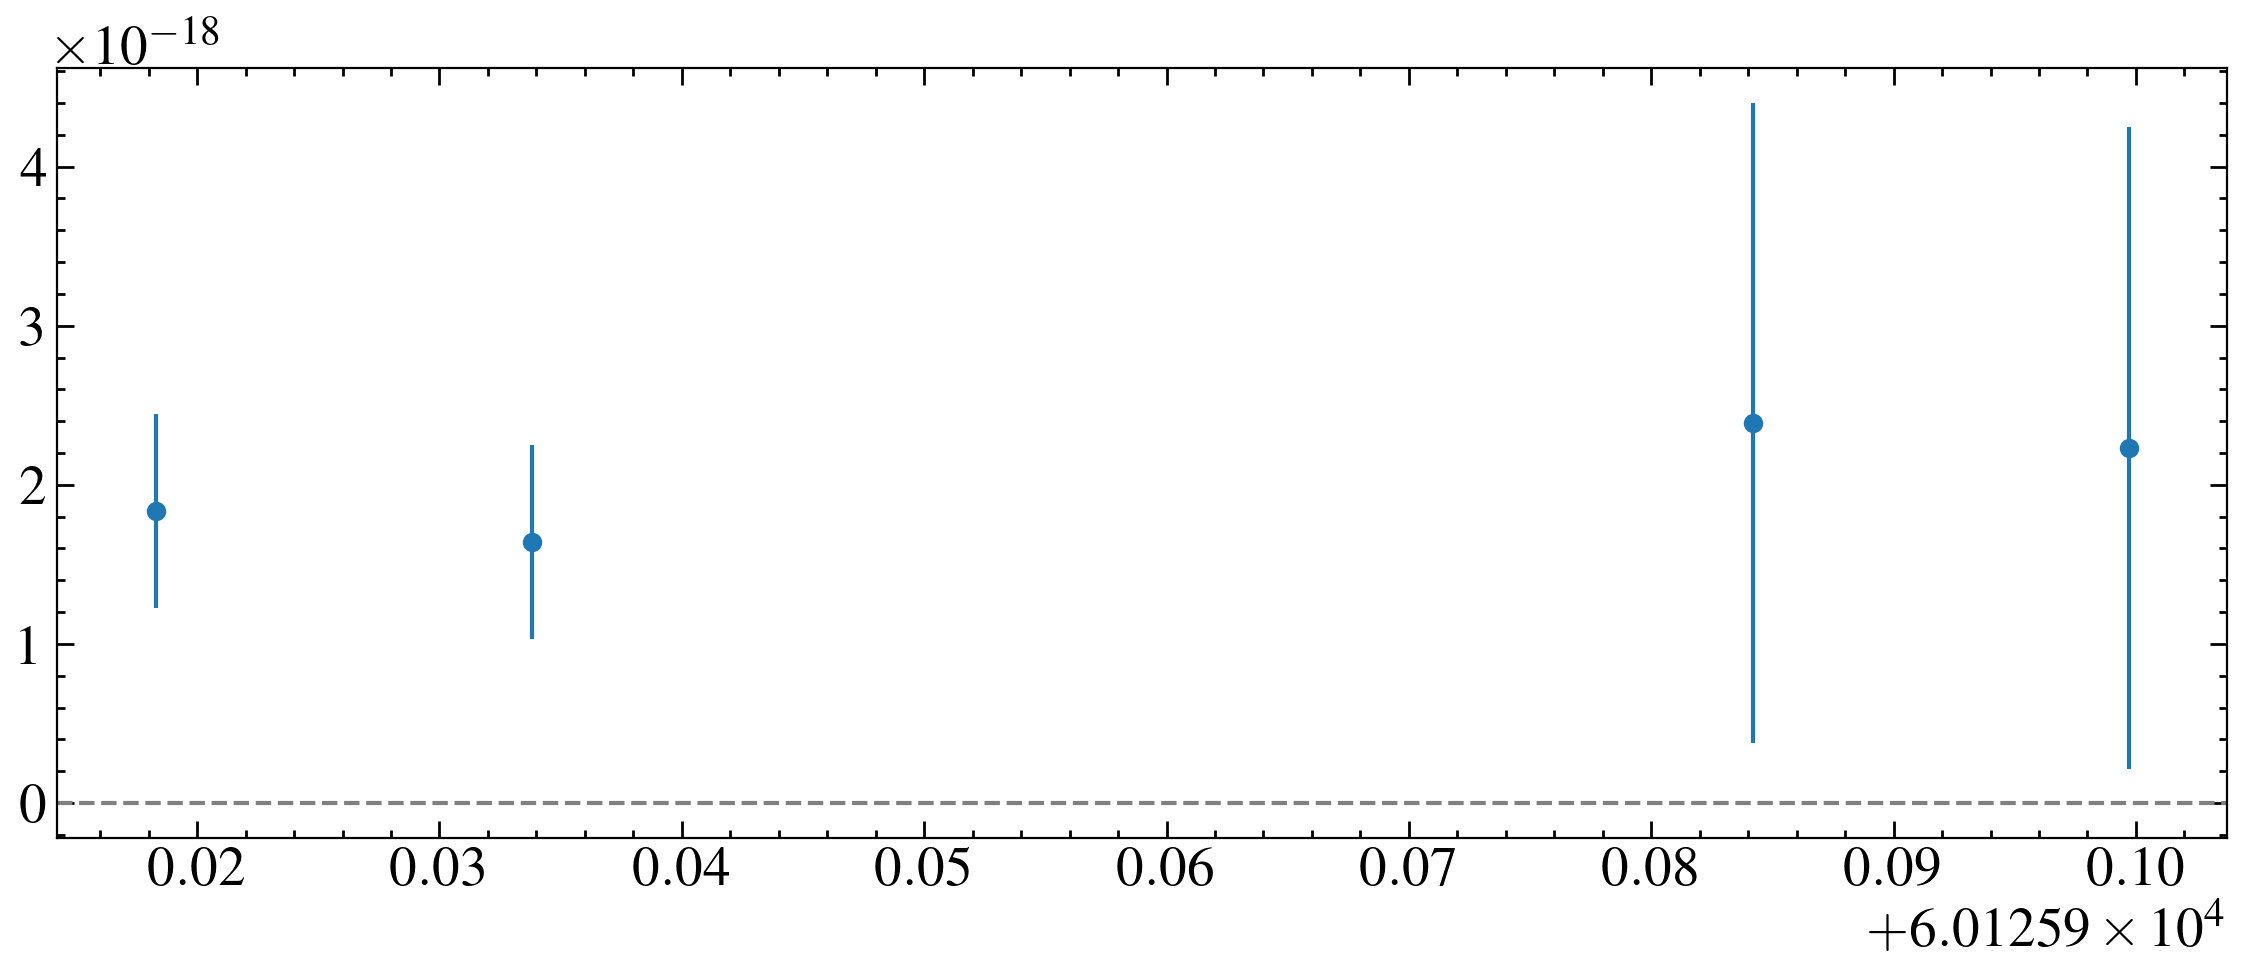

In [79]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

Ok so we use the drz images...

In [80]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ROOTNAME'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(drzs)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

jf3i04011 F150LP 60125.91830393 2600.0
jf3i04021 F165LP 60125.98419467 2600.0
2023-06-30 & ACS/SBC & F150LP & 60125.91830393 & 2600.0 & jf3i04011 & jf3i04011 \\
2023-06-30 & ACS/SBC & F165LP & 60125.98419467 & 2600.0 & jf3i04021 & jf3i04021 \\


/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04011_drz.fits
F150LP
2600.0
    aperture_sum    
--------------------
0.054396245455735195
2.684943442584319e-18 2.2576884280492165e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     454     830       0.0544         0.004574         0              0.0544


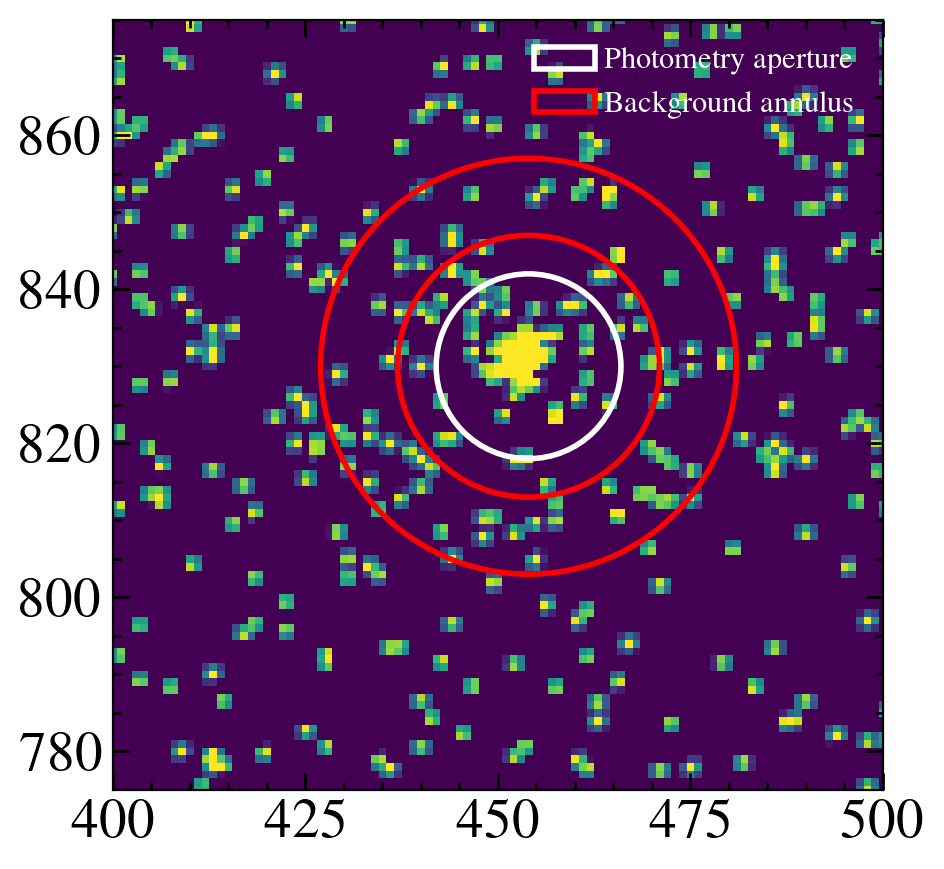

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04021_drz.fits
F165LP
2600.0
    aperture_sum    
--------------------
0.022827791723187316
3.907842647623689e-18 5.072457828923868e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     454     830      0.02283         0.002963         0             0.02283


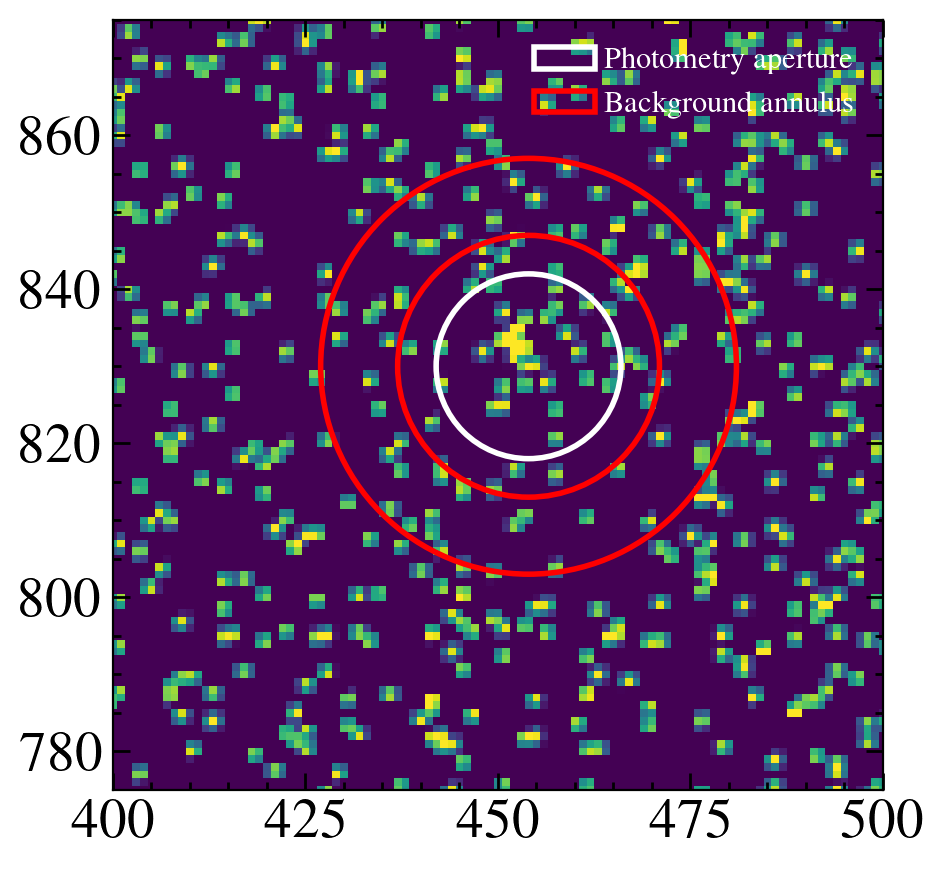

In [81]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(454, 830)]
pixscale = 0.025
ap_arc = '0.30' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
# fltsort = np.array(flts)[args]
for drz in drzs:
    print(drz)
    hdul = fits.open(drz)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
#     mask = dq != 0
    error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(400, 500)
    plt.ylim(775, 875)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error)#, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    if filt =='F150LP':
        ee = 0.715
    if filt == 'F165LP':
        ee = 0.704
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / ee 
    flux_err = phot_table['aperture_sum_err'][0]* photflam / ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)


savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME'])
savdat.write('results/epoch{}_acs_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

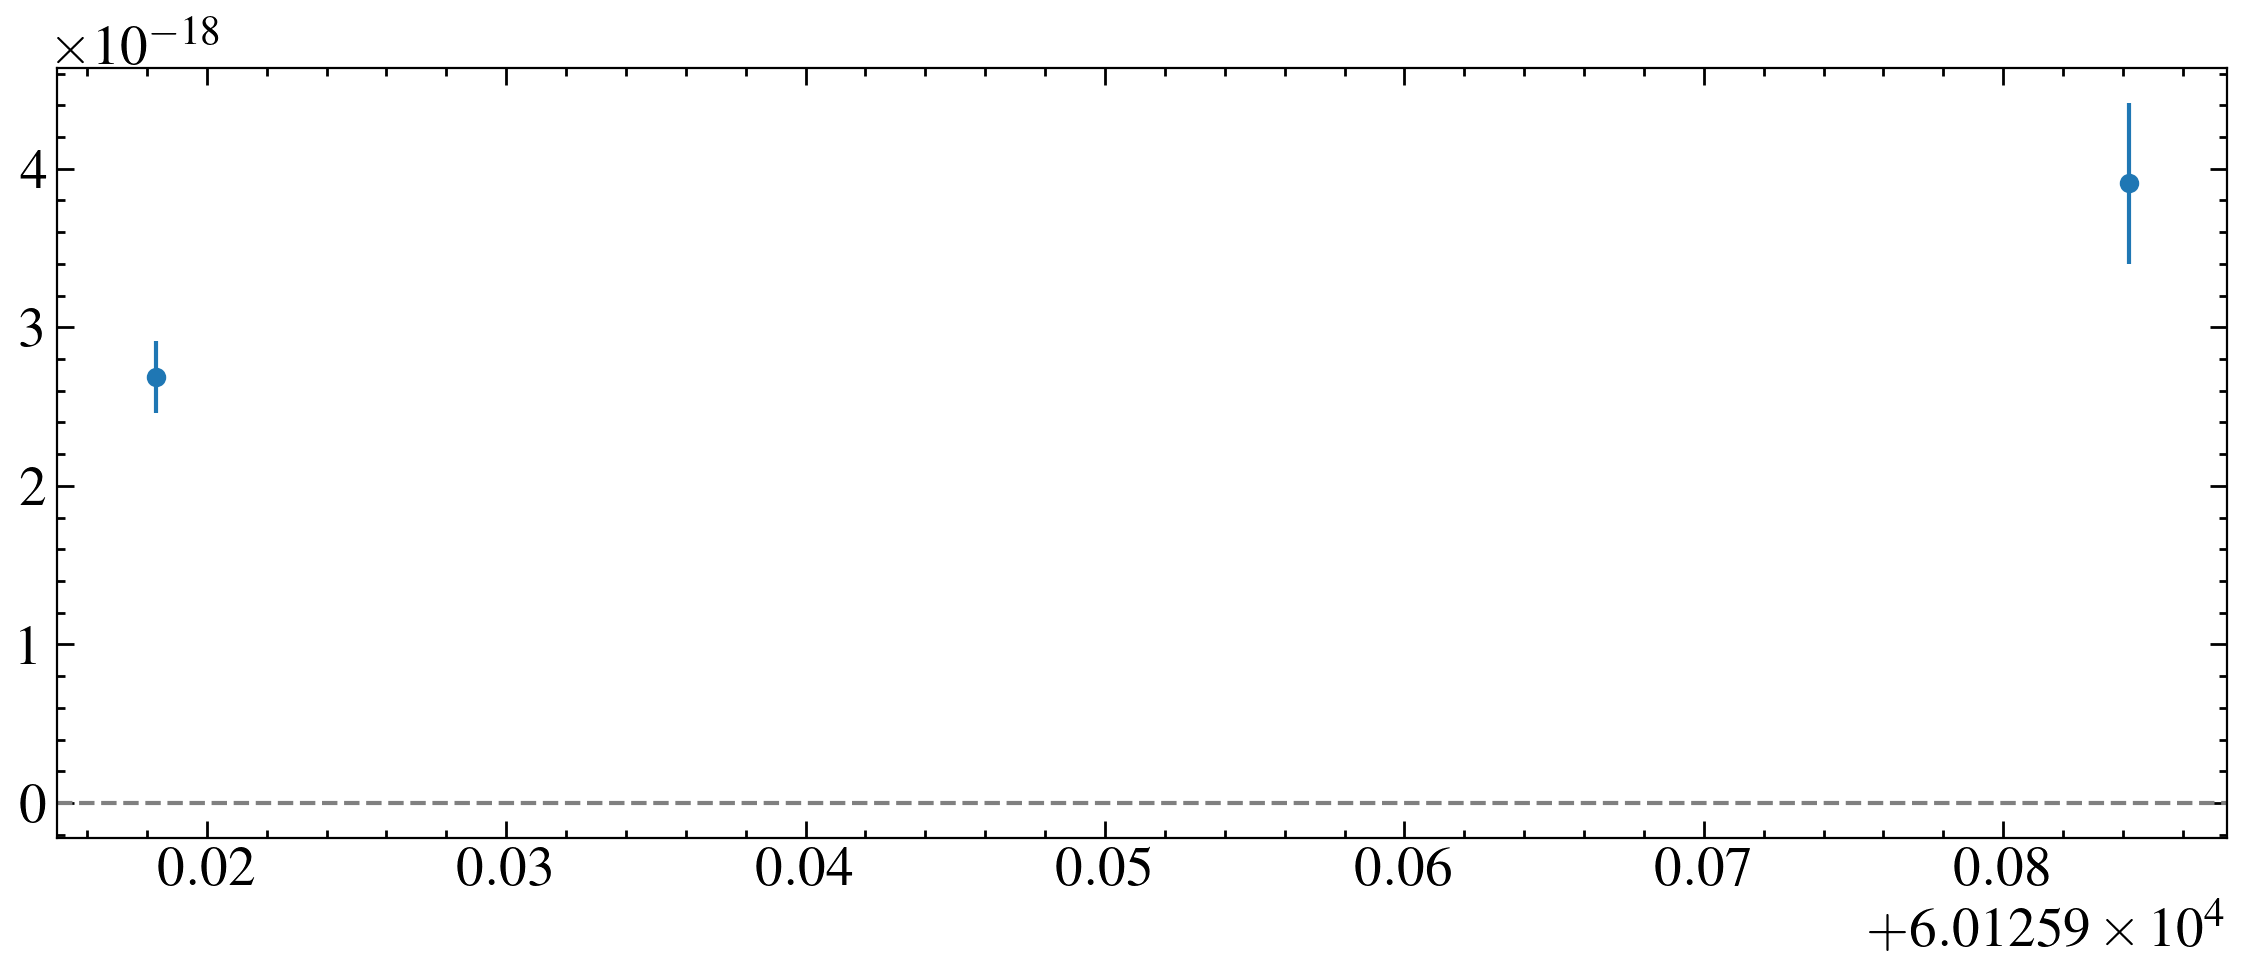

In [82]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

In [83]:
(0.696+0.701+0.715)/3

0.7039999999999998